# Rock Density Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density']

In [5]:
df.isnull().sum()

Signal     0
Density    0
dtype: int64

In [6]:
# report = sweetviz.analyze(df, target_feat="Signal")

In [7]:
# report.show_notebook()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal   300 non-null    float64
 1   Density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [9]:
df.describe()

,Signal,Density
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


<Figure size 1600x1200 with 0 Axes>

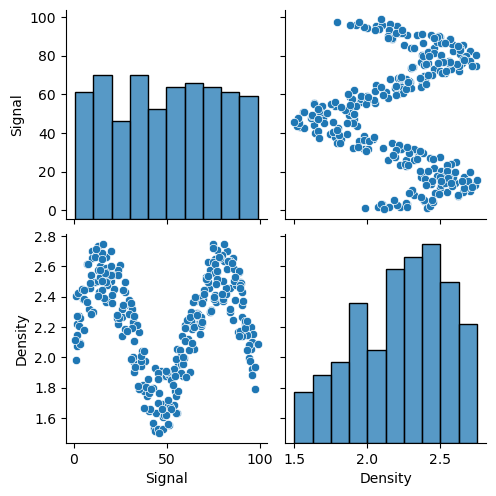

In [10]:
plt.figure(dpi=250)
sns.pairplot(data=df)

In [11]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot: xlabel='Signal', ylabel='Density'>

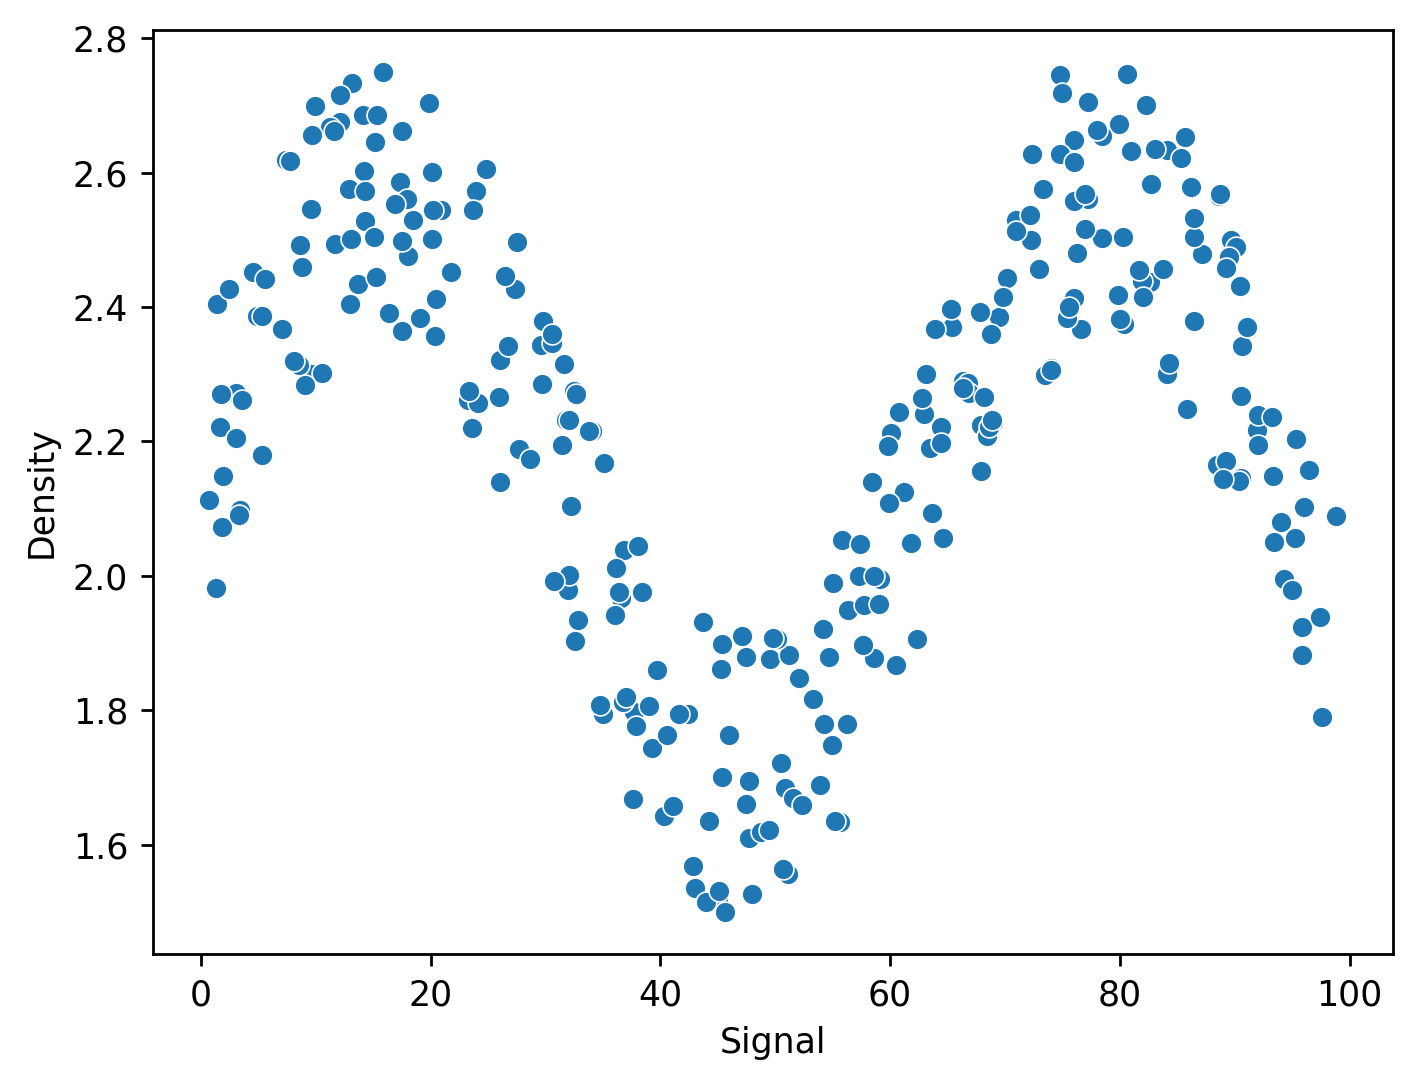

In [12]:
plt.figure(dpi=250)
sns.scatterplot(x='Signal', y='Density', data=df)

In [13]:
X = df['Signal'].values.reshape(-1, 1)

In [14]:
y = df['Density'].values.reshape(-1, 1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [20]:
lr_preds = lr_model.predict(X_test)

In [21]:
lr_preds

array([[2.22029657],
       [2.22047771],
       [2.22035637],
       [2.22034337],
       [2.22039737],
       [2.22050555],
       [2.22042659],
       [2.22028877],
       [2.22034673],
       [2.22029714],
       [2.22041506],
       [2.22050153],
       [2.22043891],
       [2.22042003],
       [2.22047022],
       [2.22032403],
       [2.22033377],
       [2.22030628],
       [2.22035154],
       [2.22035373],
       [2.22029266],
       [2.22036798],
       [2.22033018],
       [2.22030611],
       [2.22042754],
       [2.22044019],
       [2.2204142 ],
       [2.22040303],
       [2.22048946],
       [2.22047495]])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [24]:
mean_squared_error(y_test, lr_preds)

0.0660516726514864

In [25]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [26]:
signal_range = np.arange(0, 100)

In [27]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [28]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

In [29]:
signal_preds

array([[2.22028446],
       [2.22028673],
       [2.22028899],
       [2.22029126],
       [2.22029353],
       [2.22029579],
       [2.22029806],
       [2.22030032],
       [2.22030259],
       [2.22030485],
       [2.22030712],
       [2.22030938],
       [2.22031165],
       [2.22031391],
       [2.22031618],
       [2.22031844],
       [2.22032071],
       [2.22032297],
       [2.22032524],
       [2.2203275 ],
       [2.22032977],
       [2.22033204],
       [2.2203343 ],
       [2.22033657],
       [2.22033883],
       [2.2203411 ],
       [2.22034336],
       [2.22034563],
       [2.22034789],
       [2.22035016],
       [2.22035242],
       [2.22035469],
       [2.22035695],
       [2.22035922],
       [2.22036148],
       [2.22036375],
       [2.22036602],
       [2.22036828],
       [2.22037055],
       [2.22037281],
       [2.22037508],
       [2.22037734],
       [2.22037961],
       [2.22038187],
       [2.22038414],
       [2.2203864 ],
       [2.22038867],
       [2.220

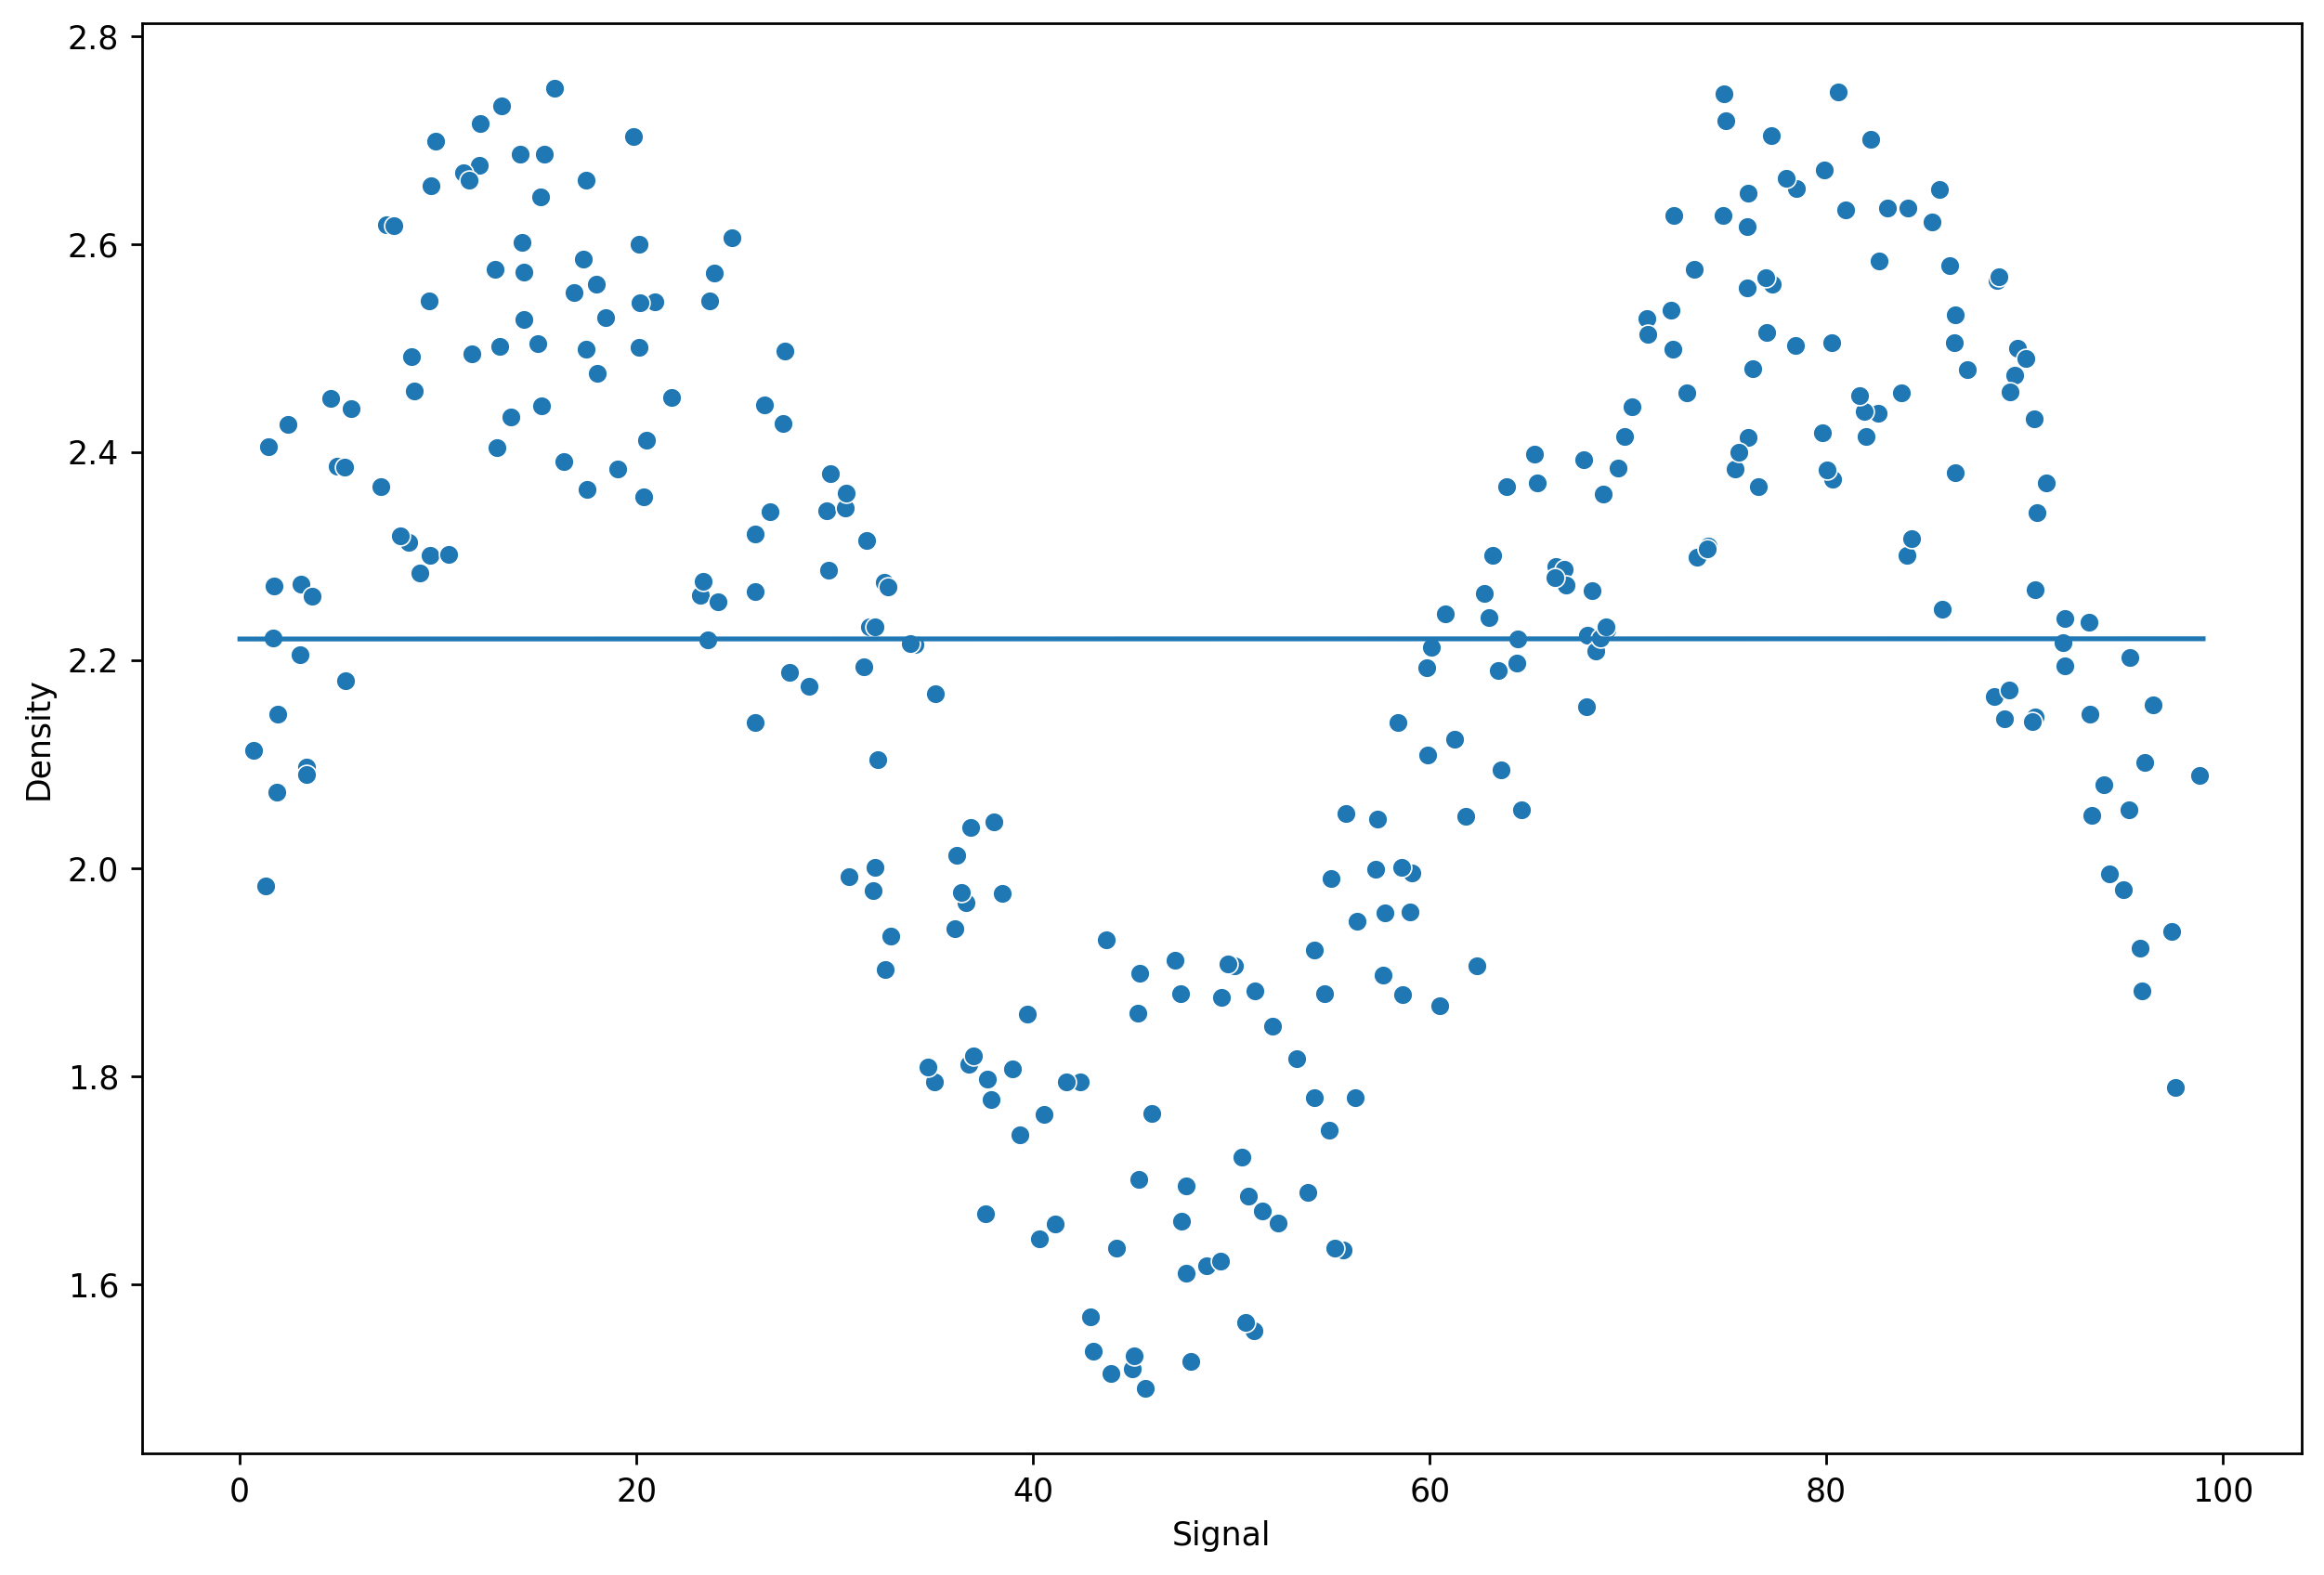

In [30]:
plt.figure(figsize=(12, 8), dpi=250)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)

In [31]:
def run_model(model, X_train, y_train, X_test, y_test):
    # FIT MODEL TO TRAINING dATA
    model.fit(X_train, y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    plt.figure(figsize=(12, 8), dpi=250)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    plt.plot(signal_range, signal_preds)
    

MAE: 0.211198973318633
RMSE: 0.2570051996584629


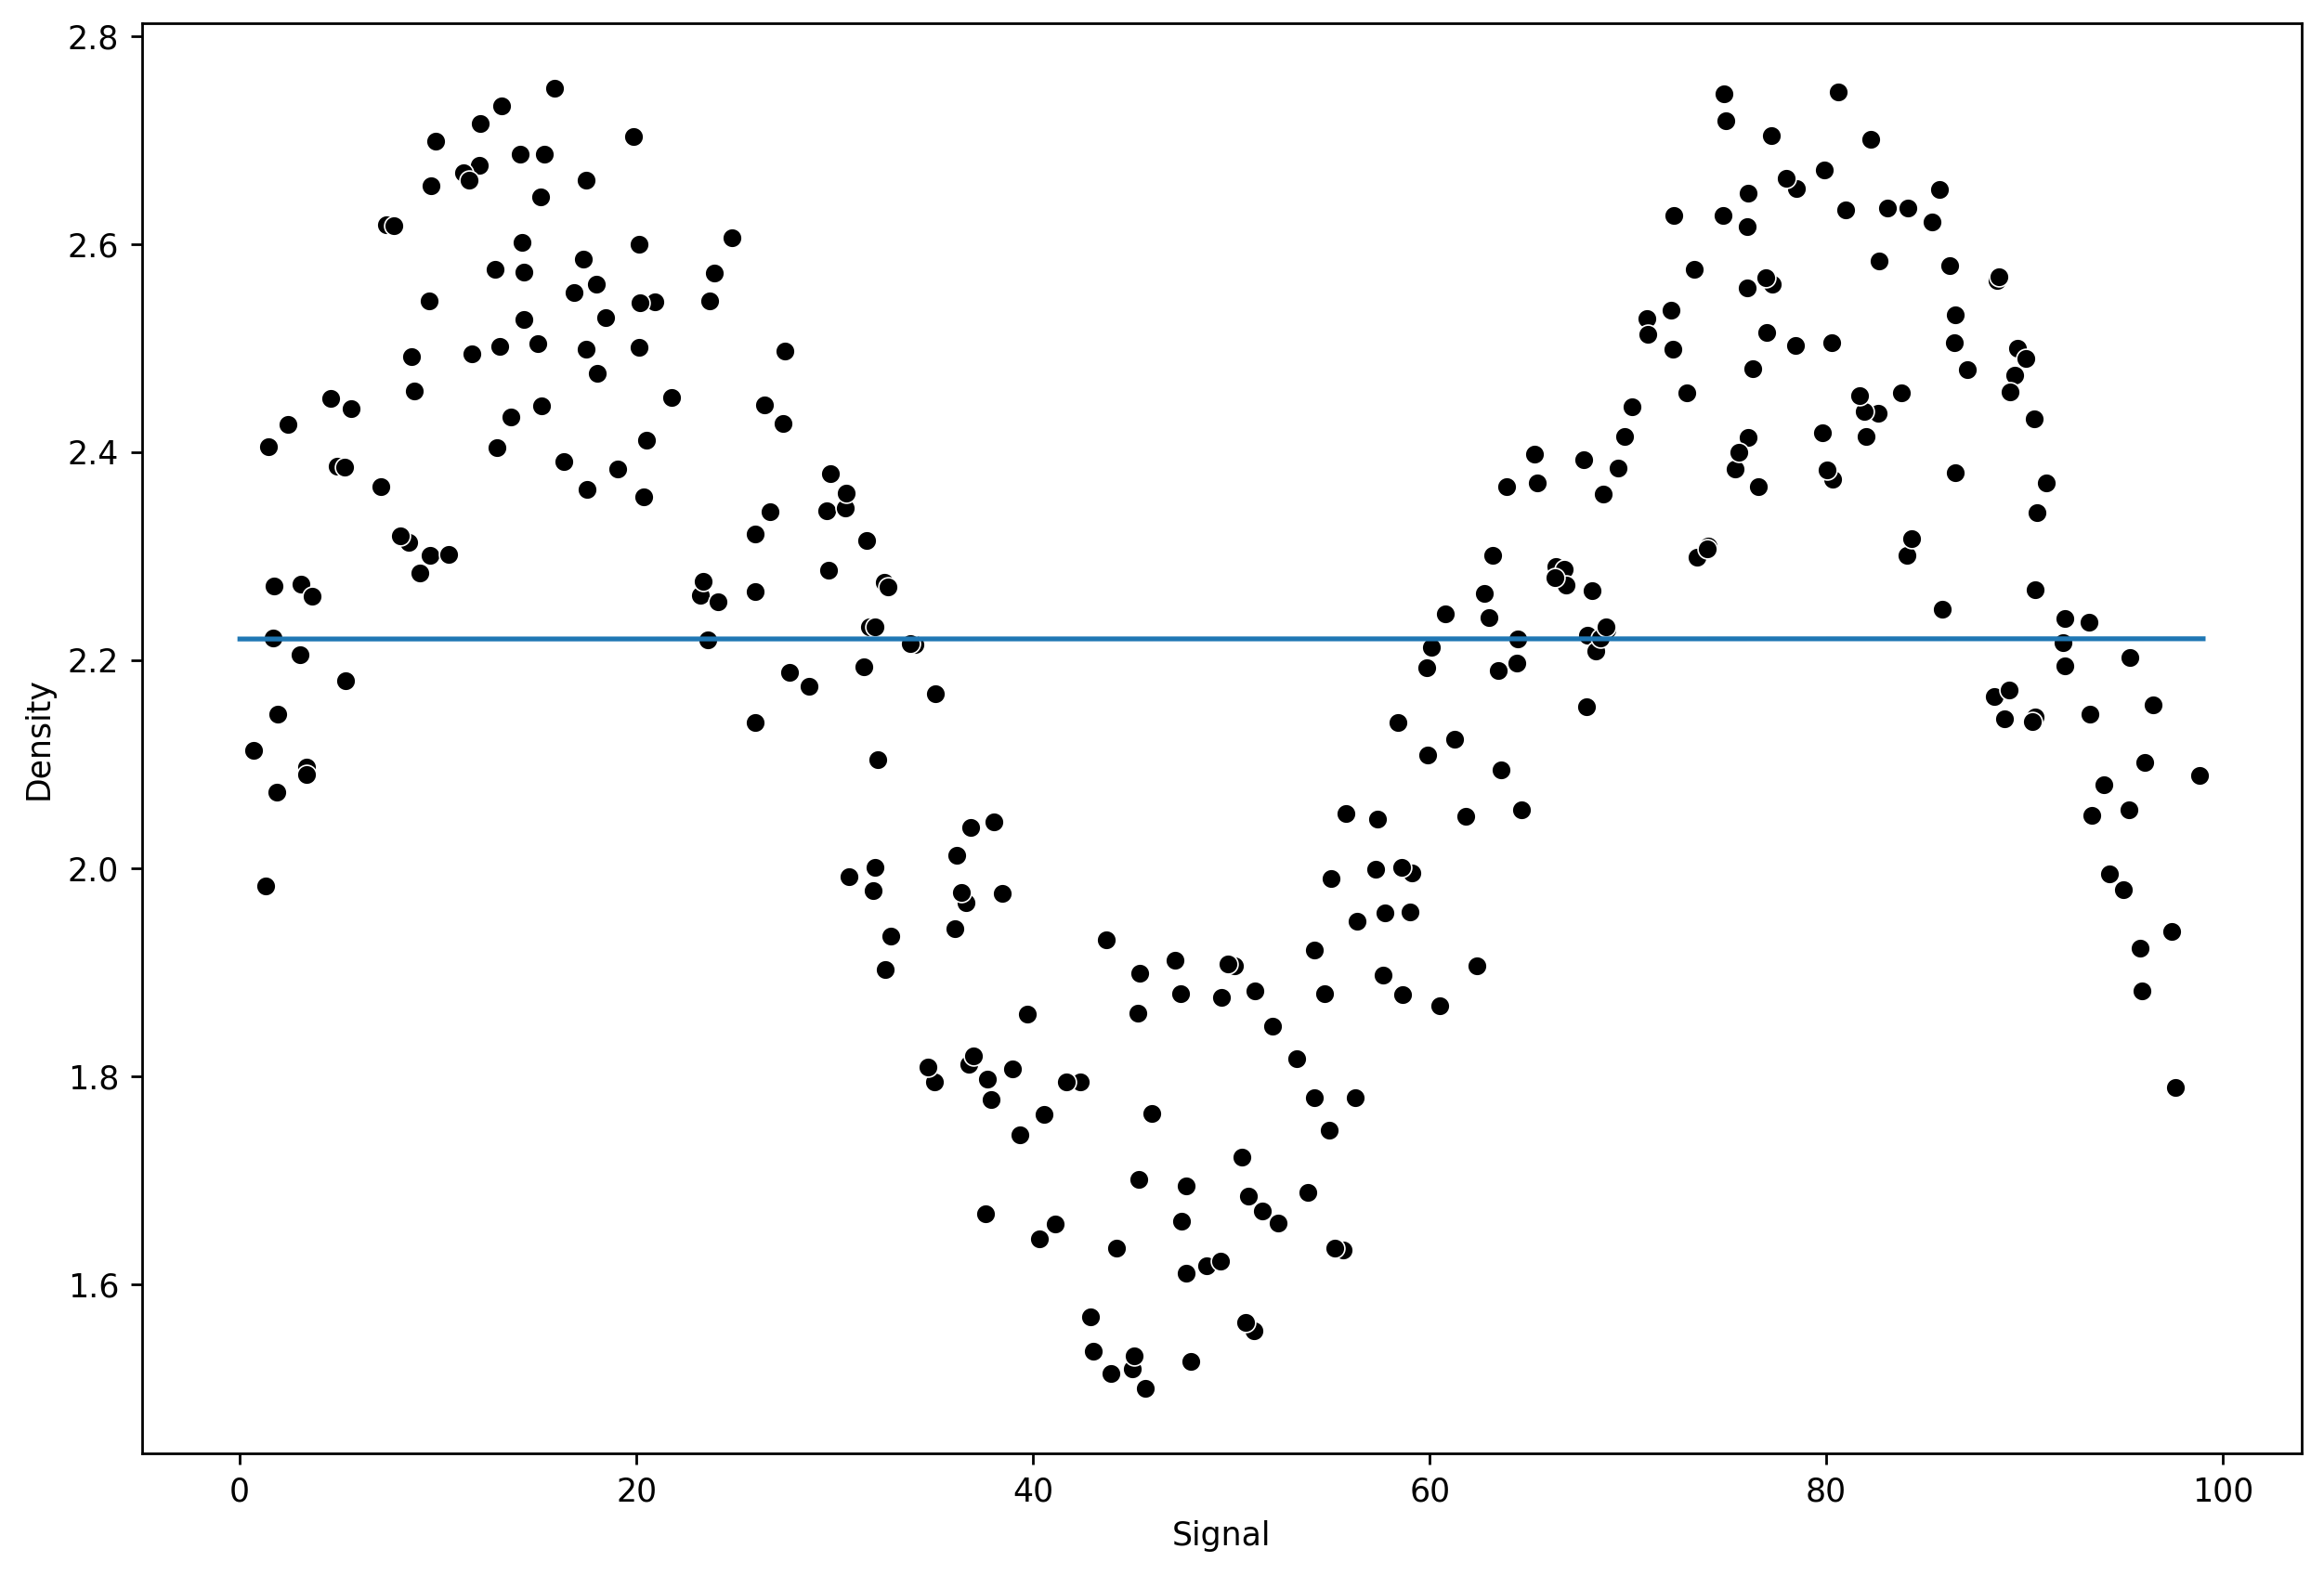

In [32]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pipe = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())

MAE: 0.118643119564546
RMSE: 0.14452813034702156


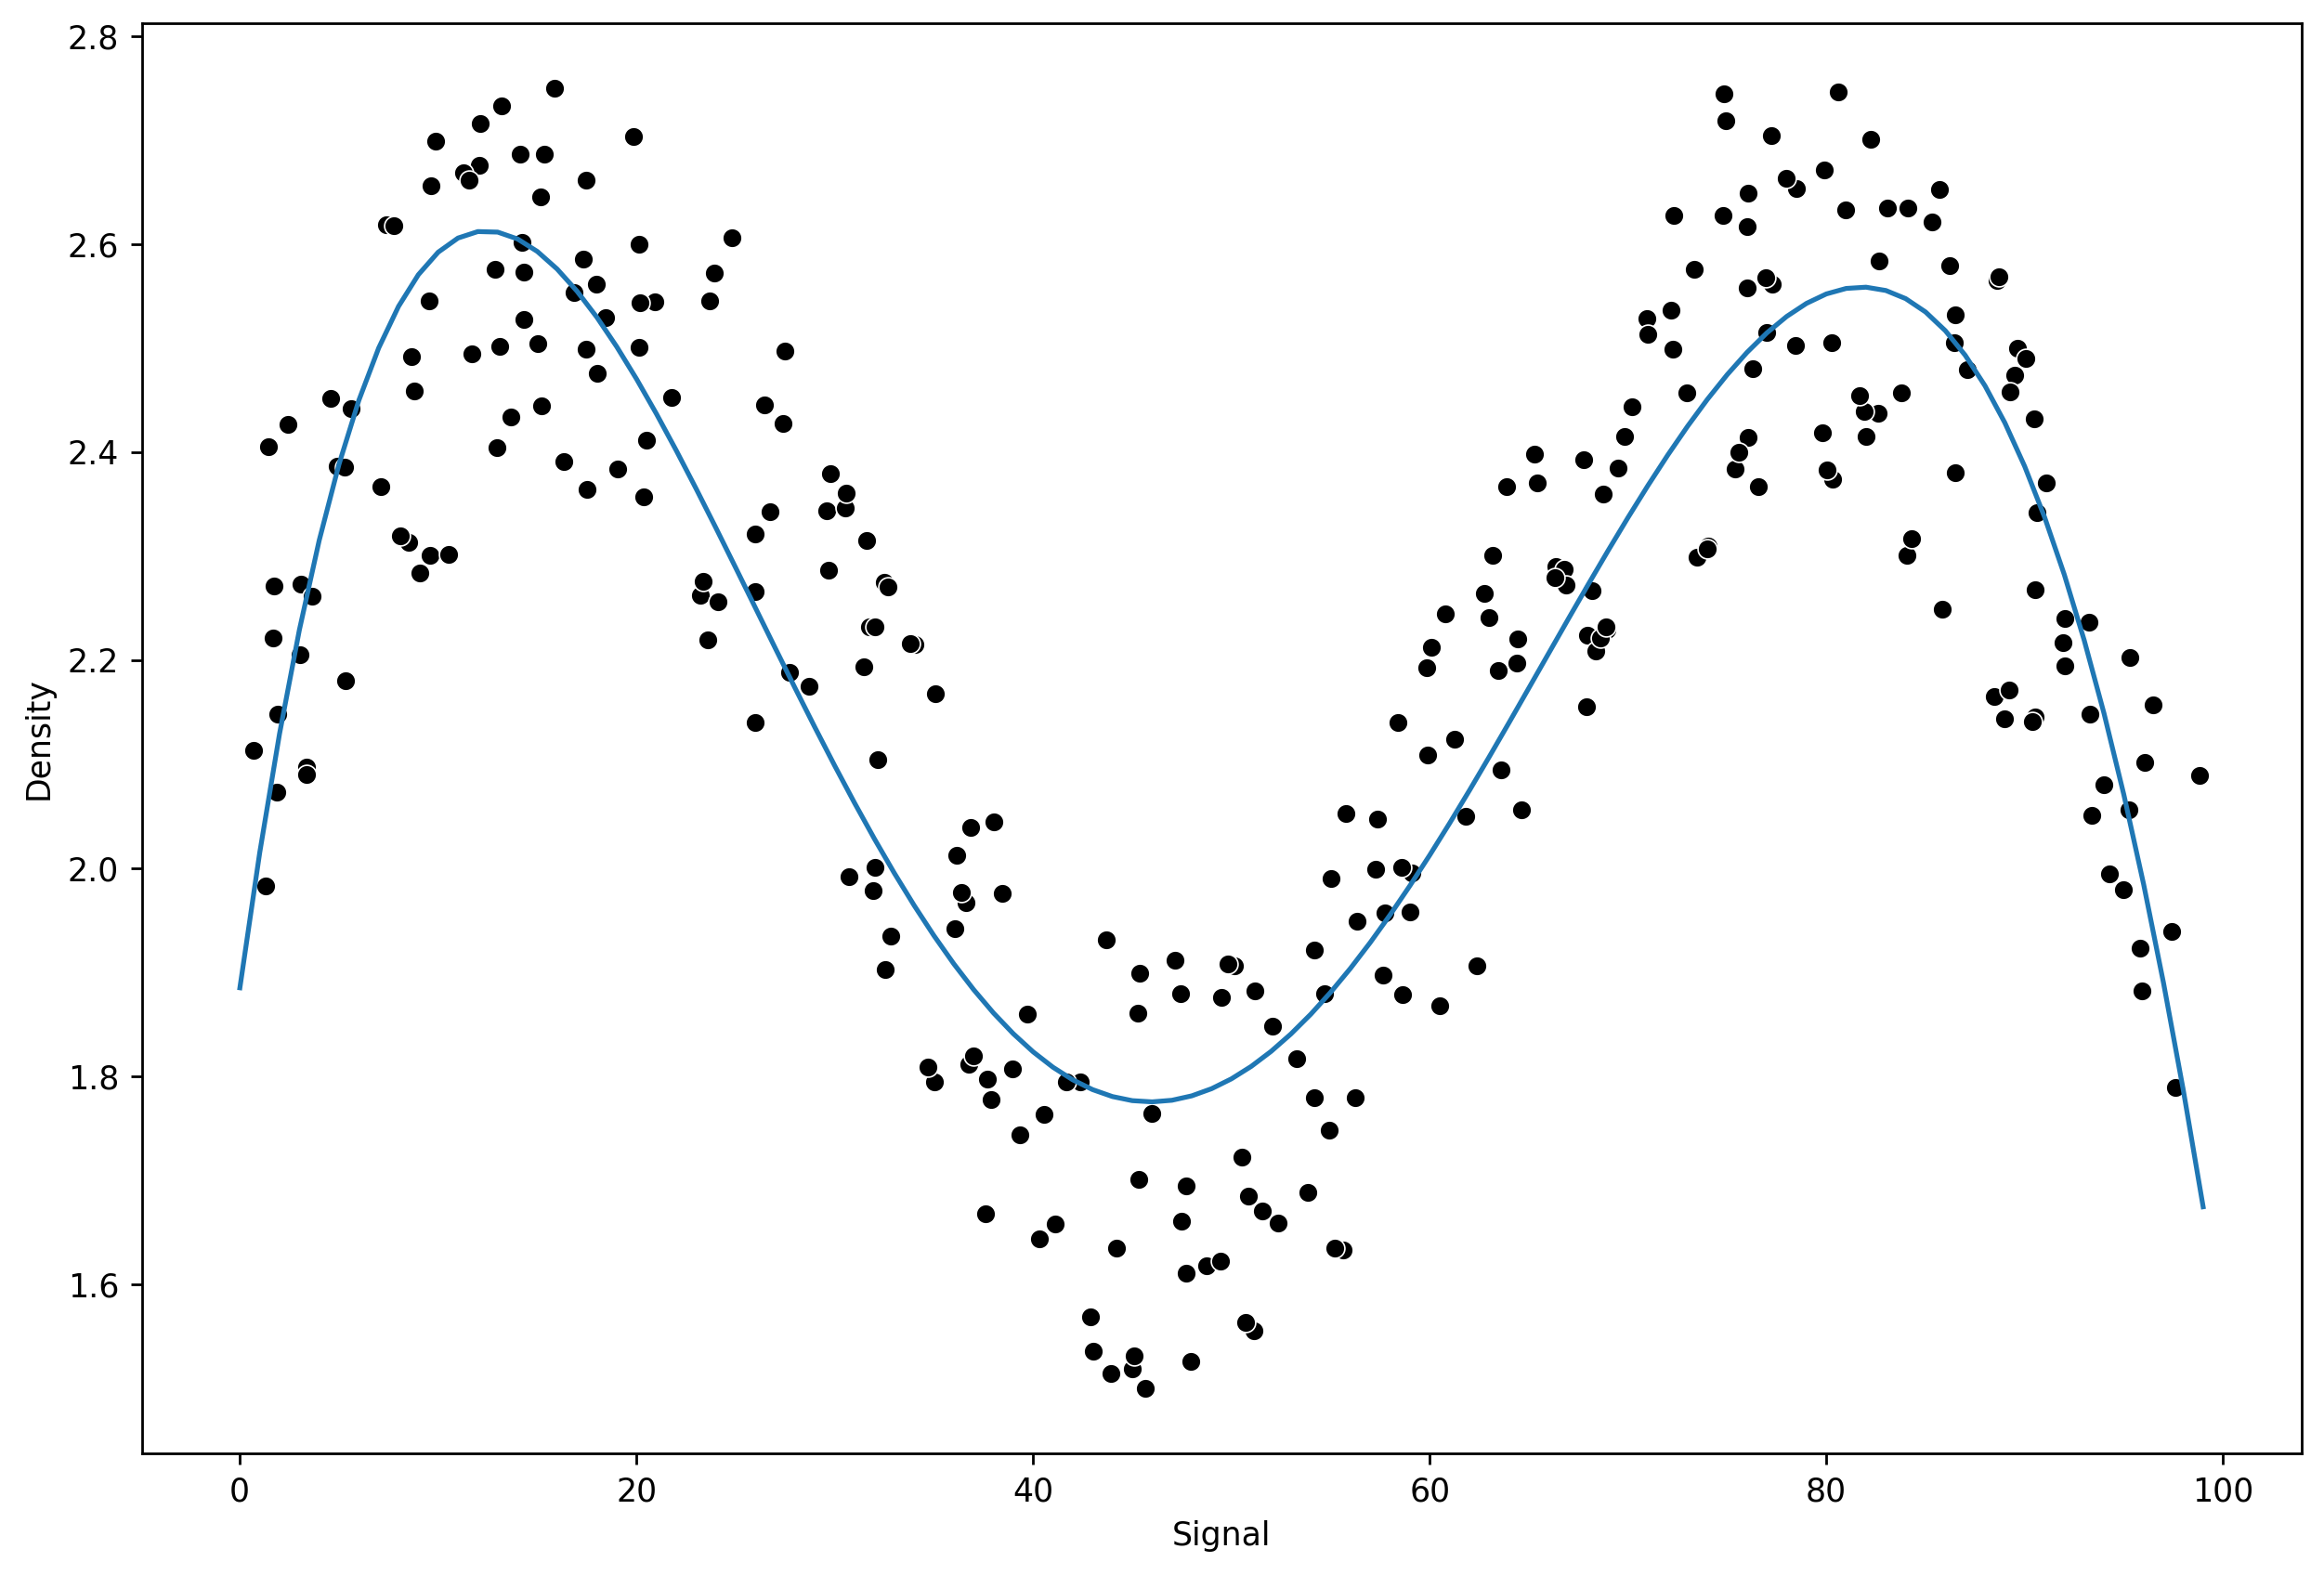

In [35]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


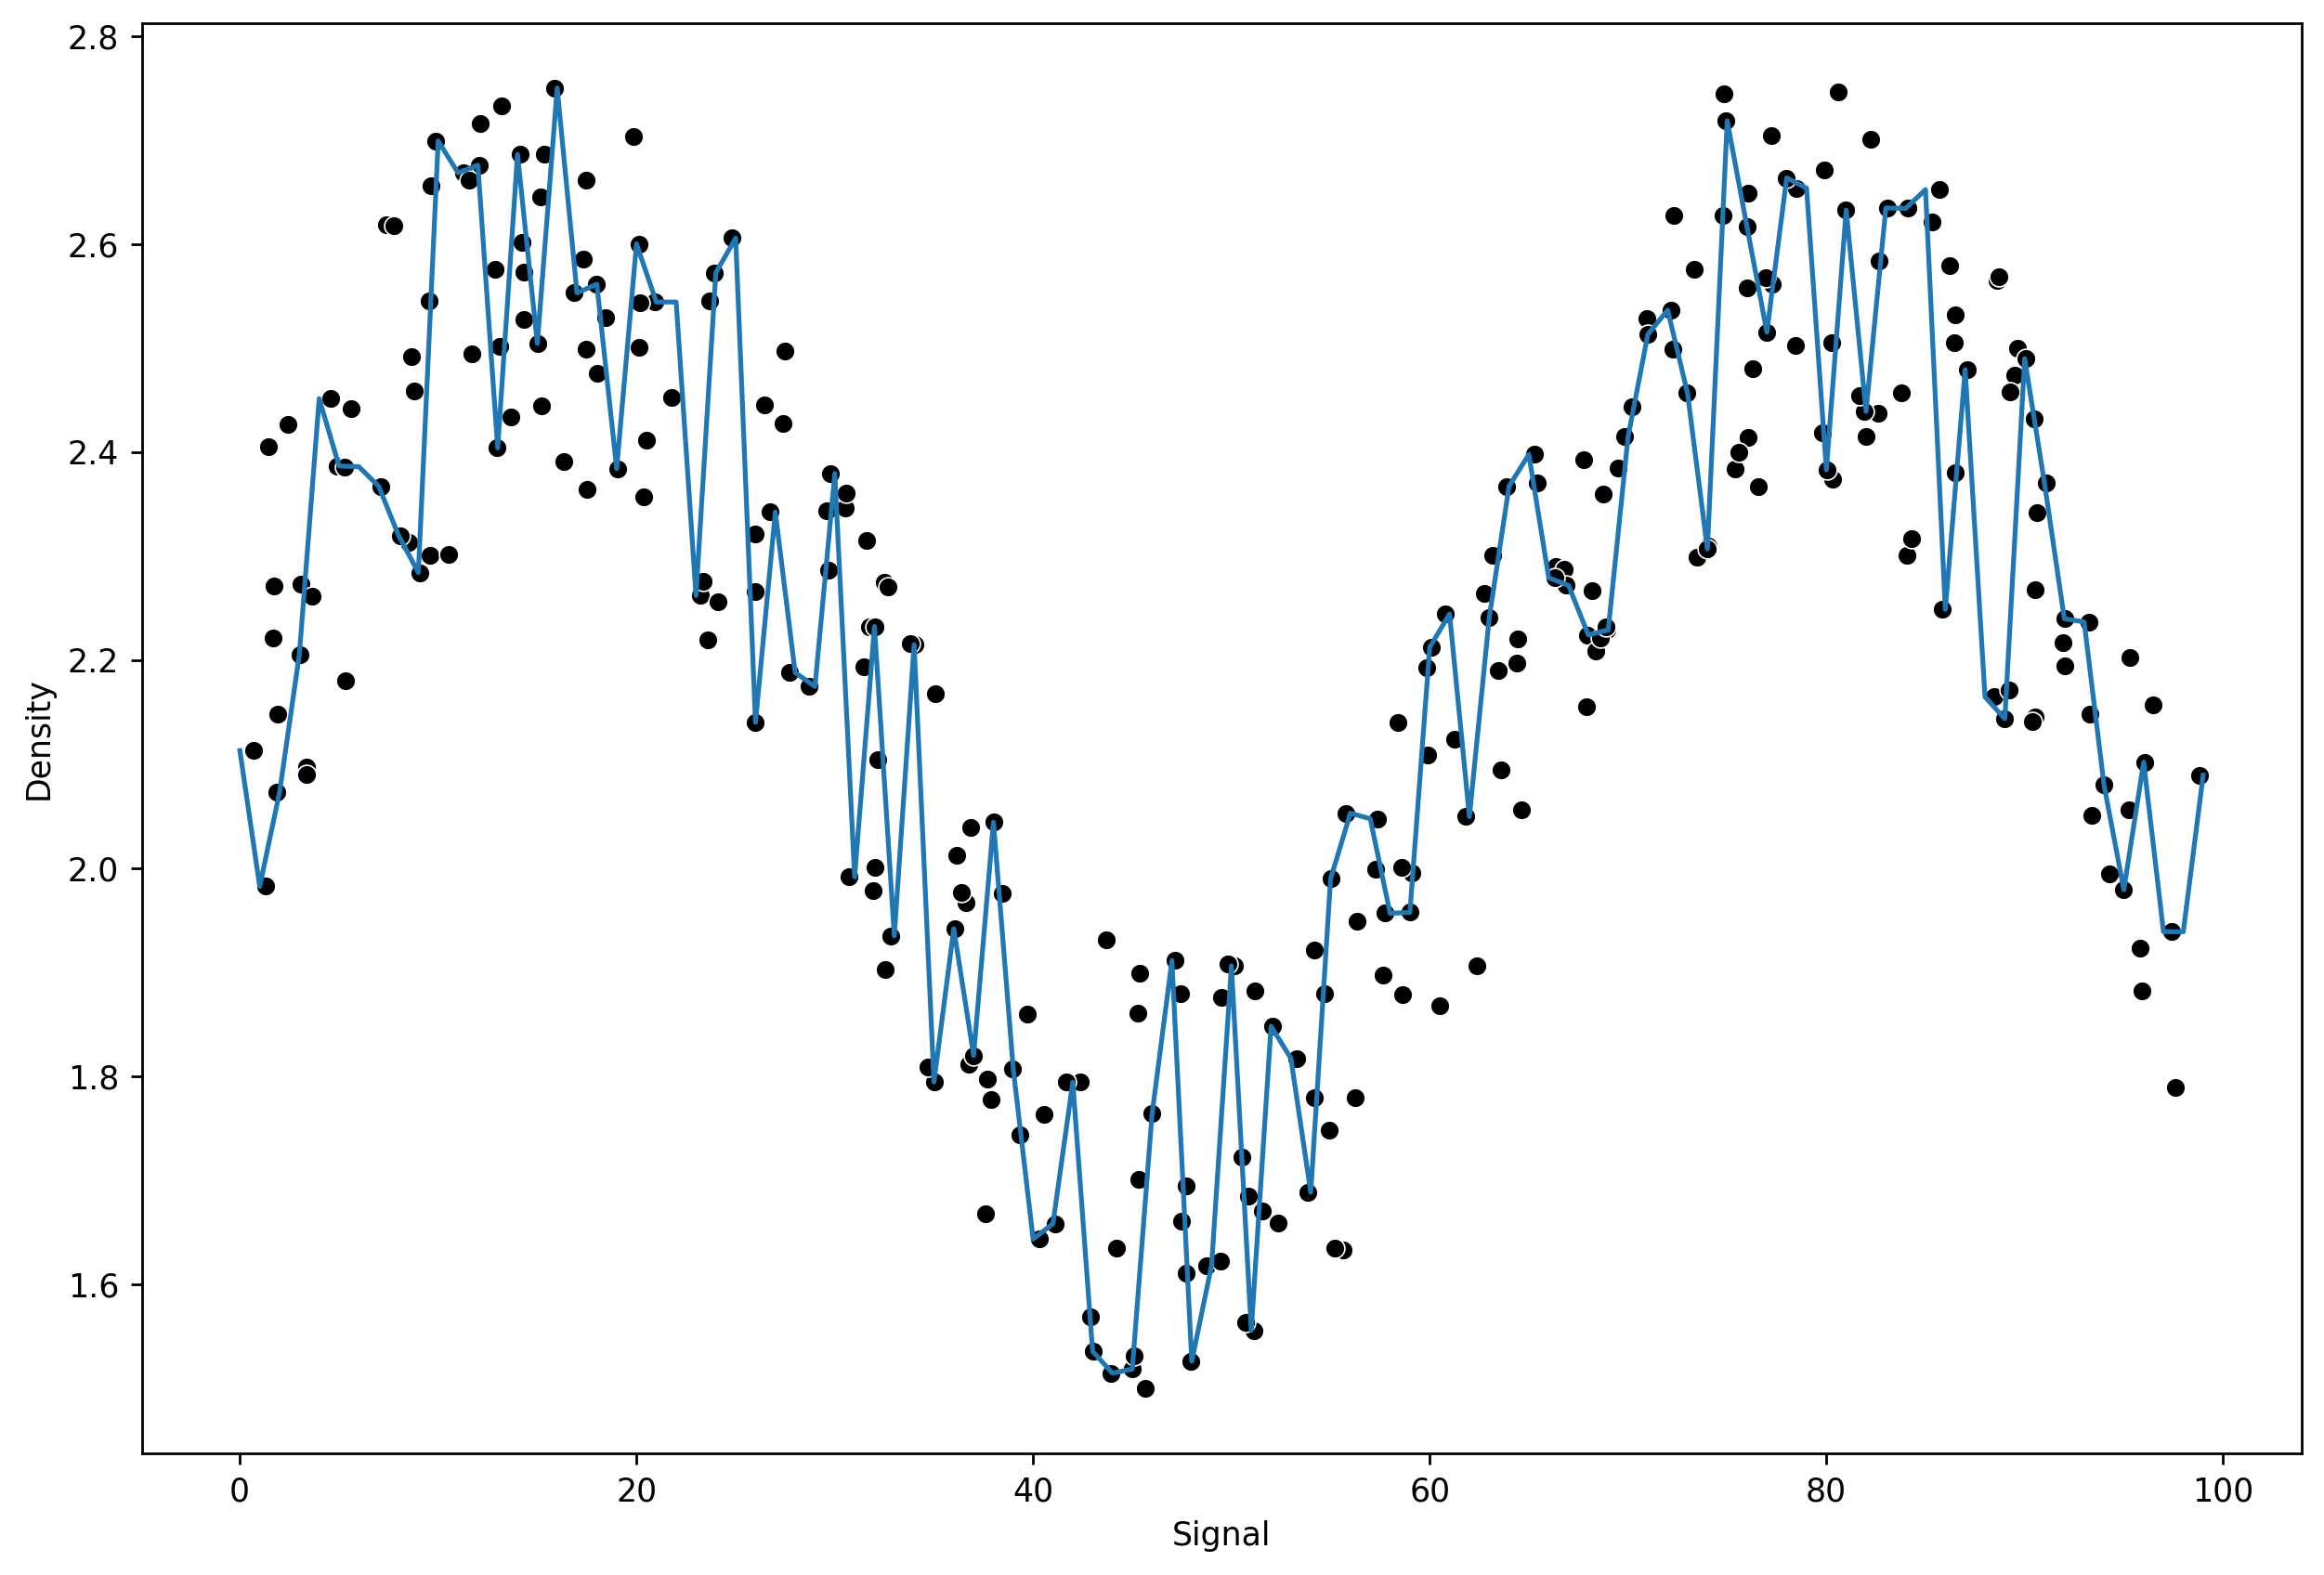

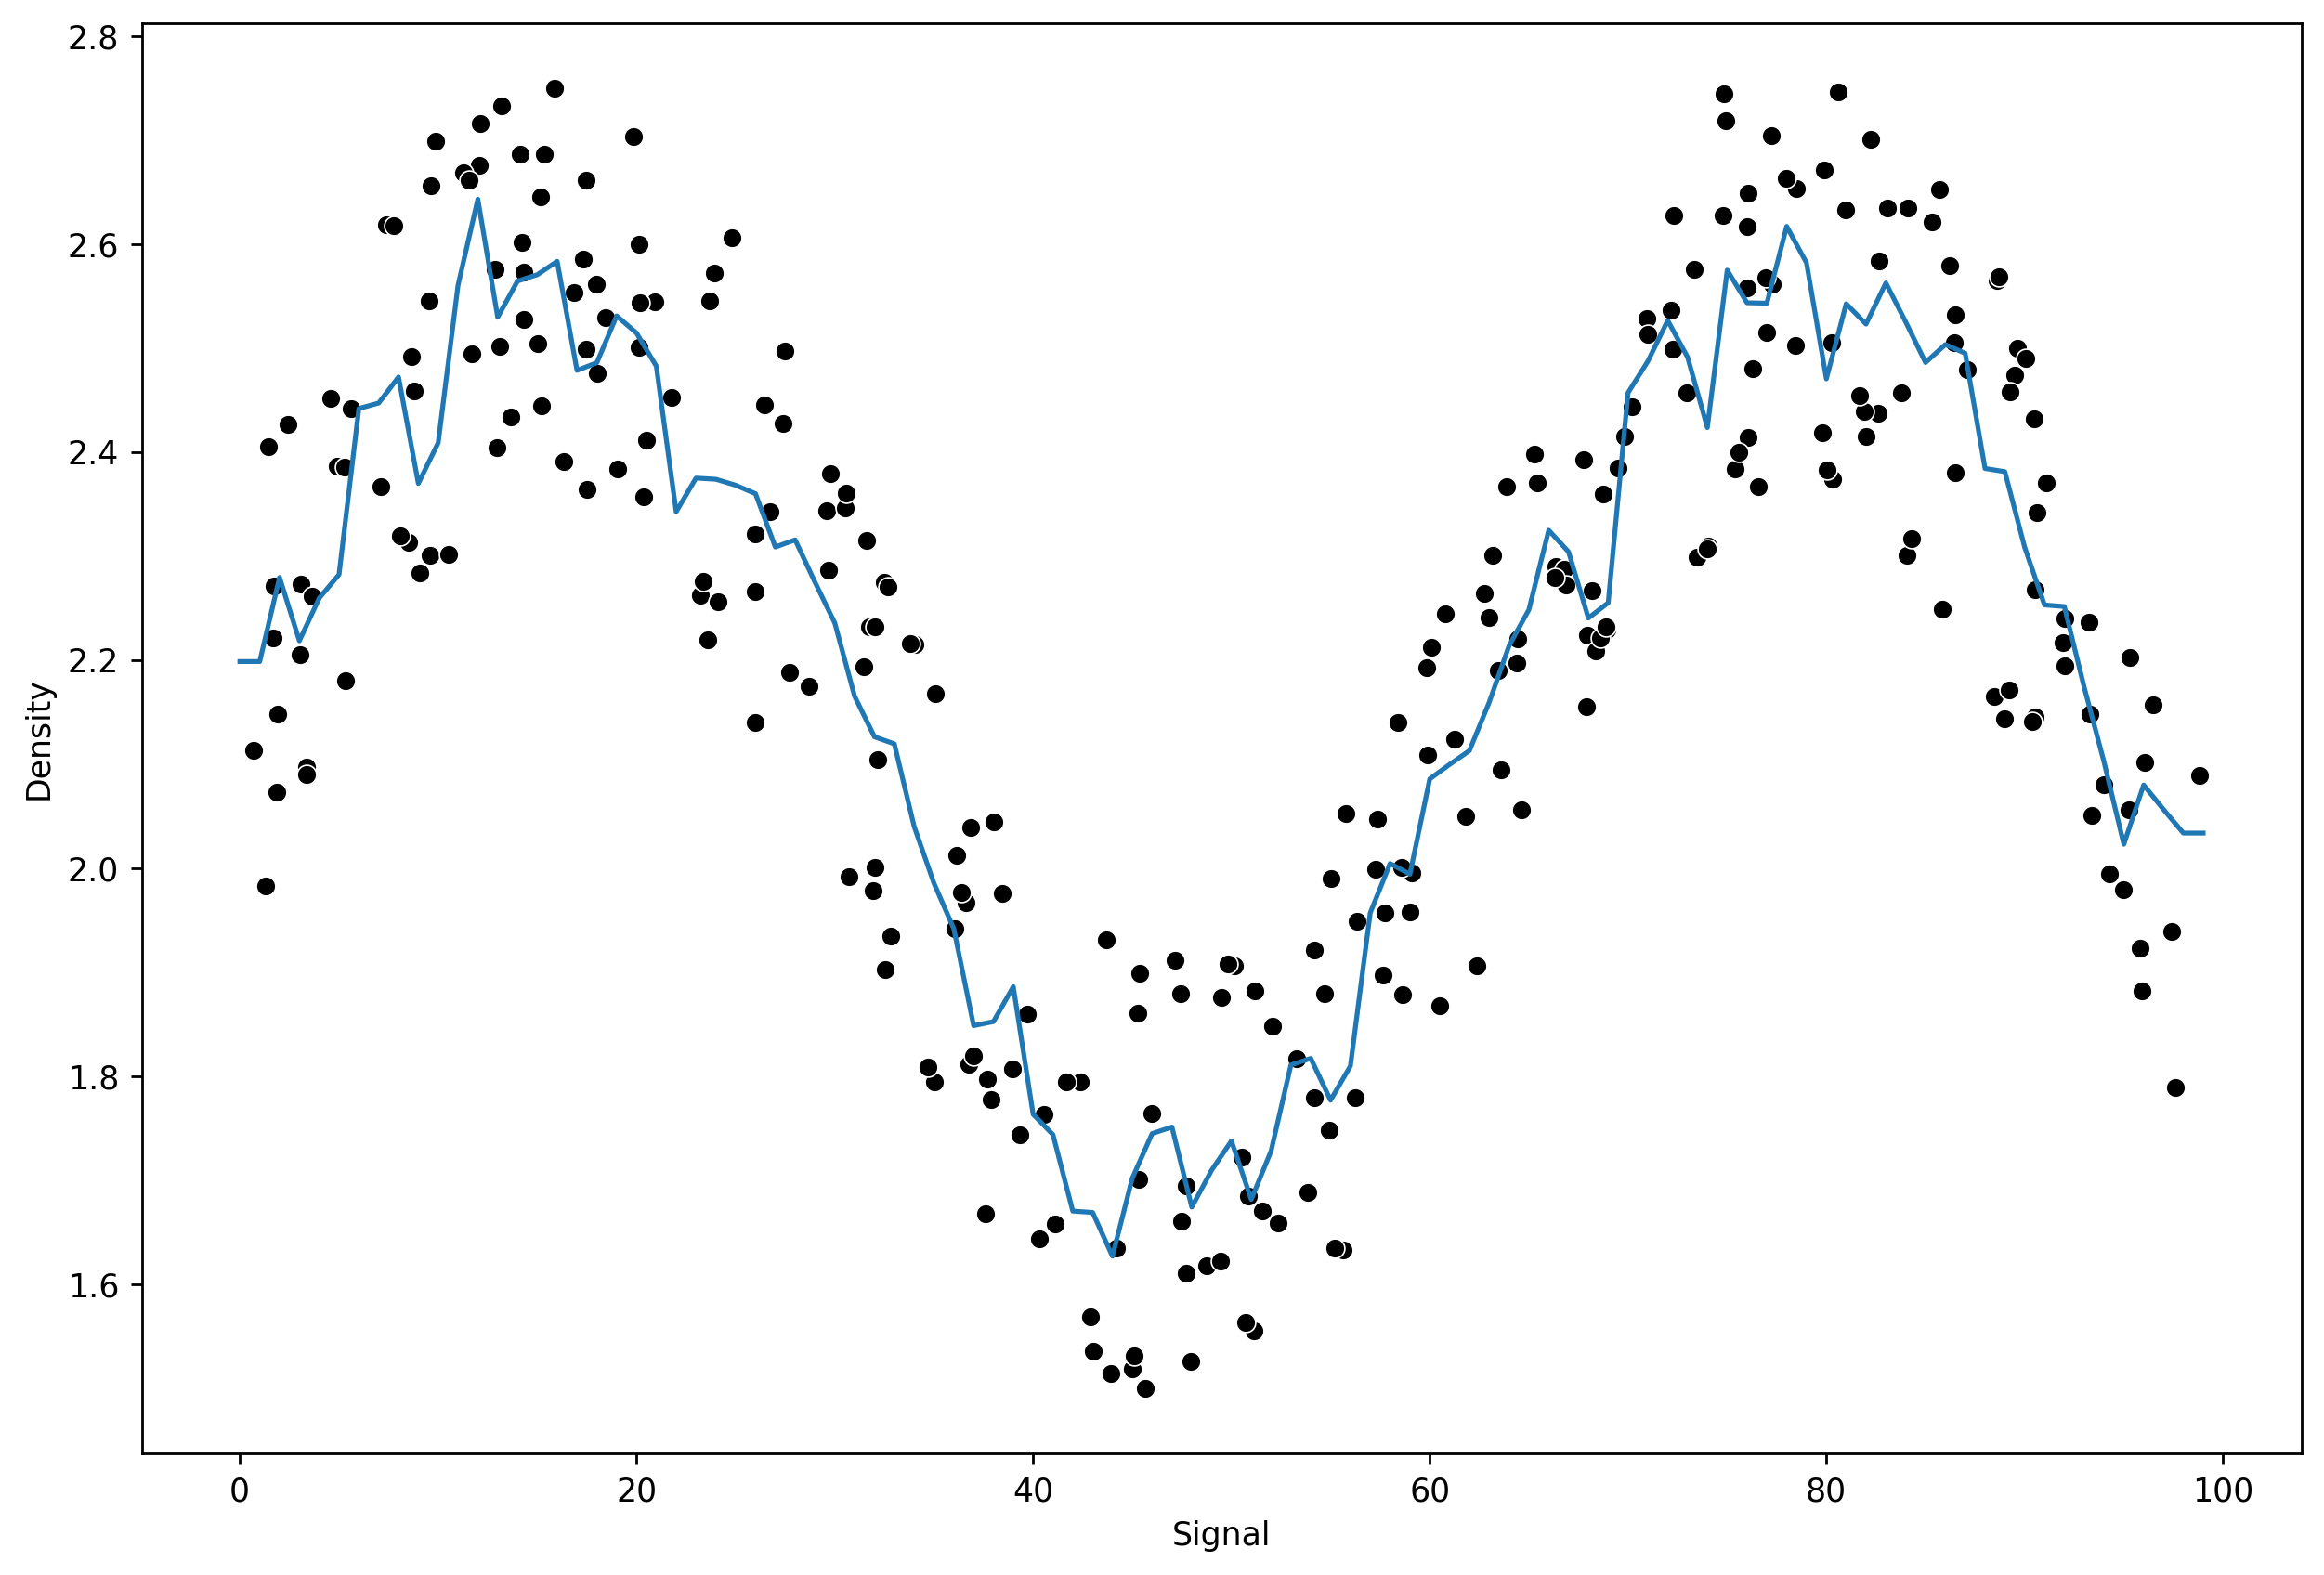

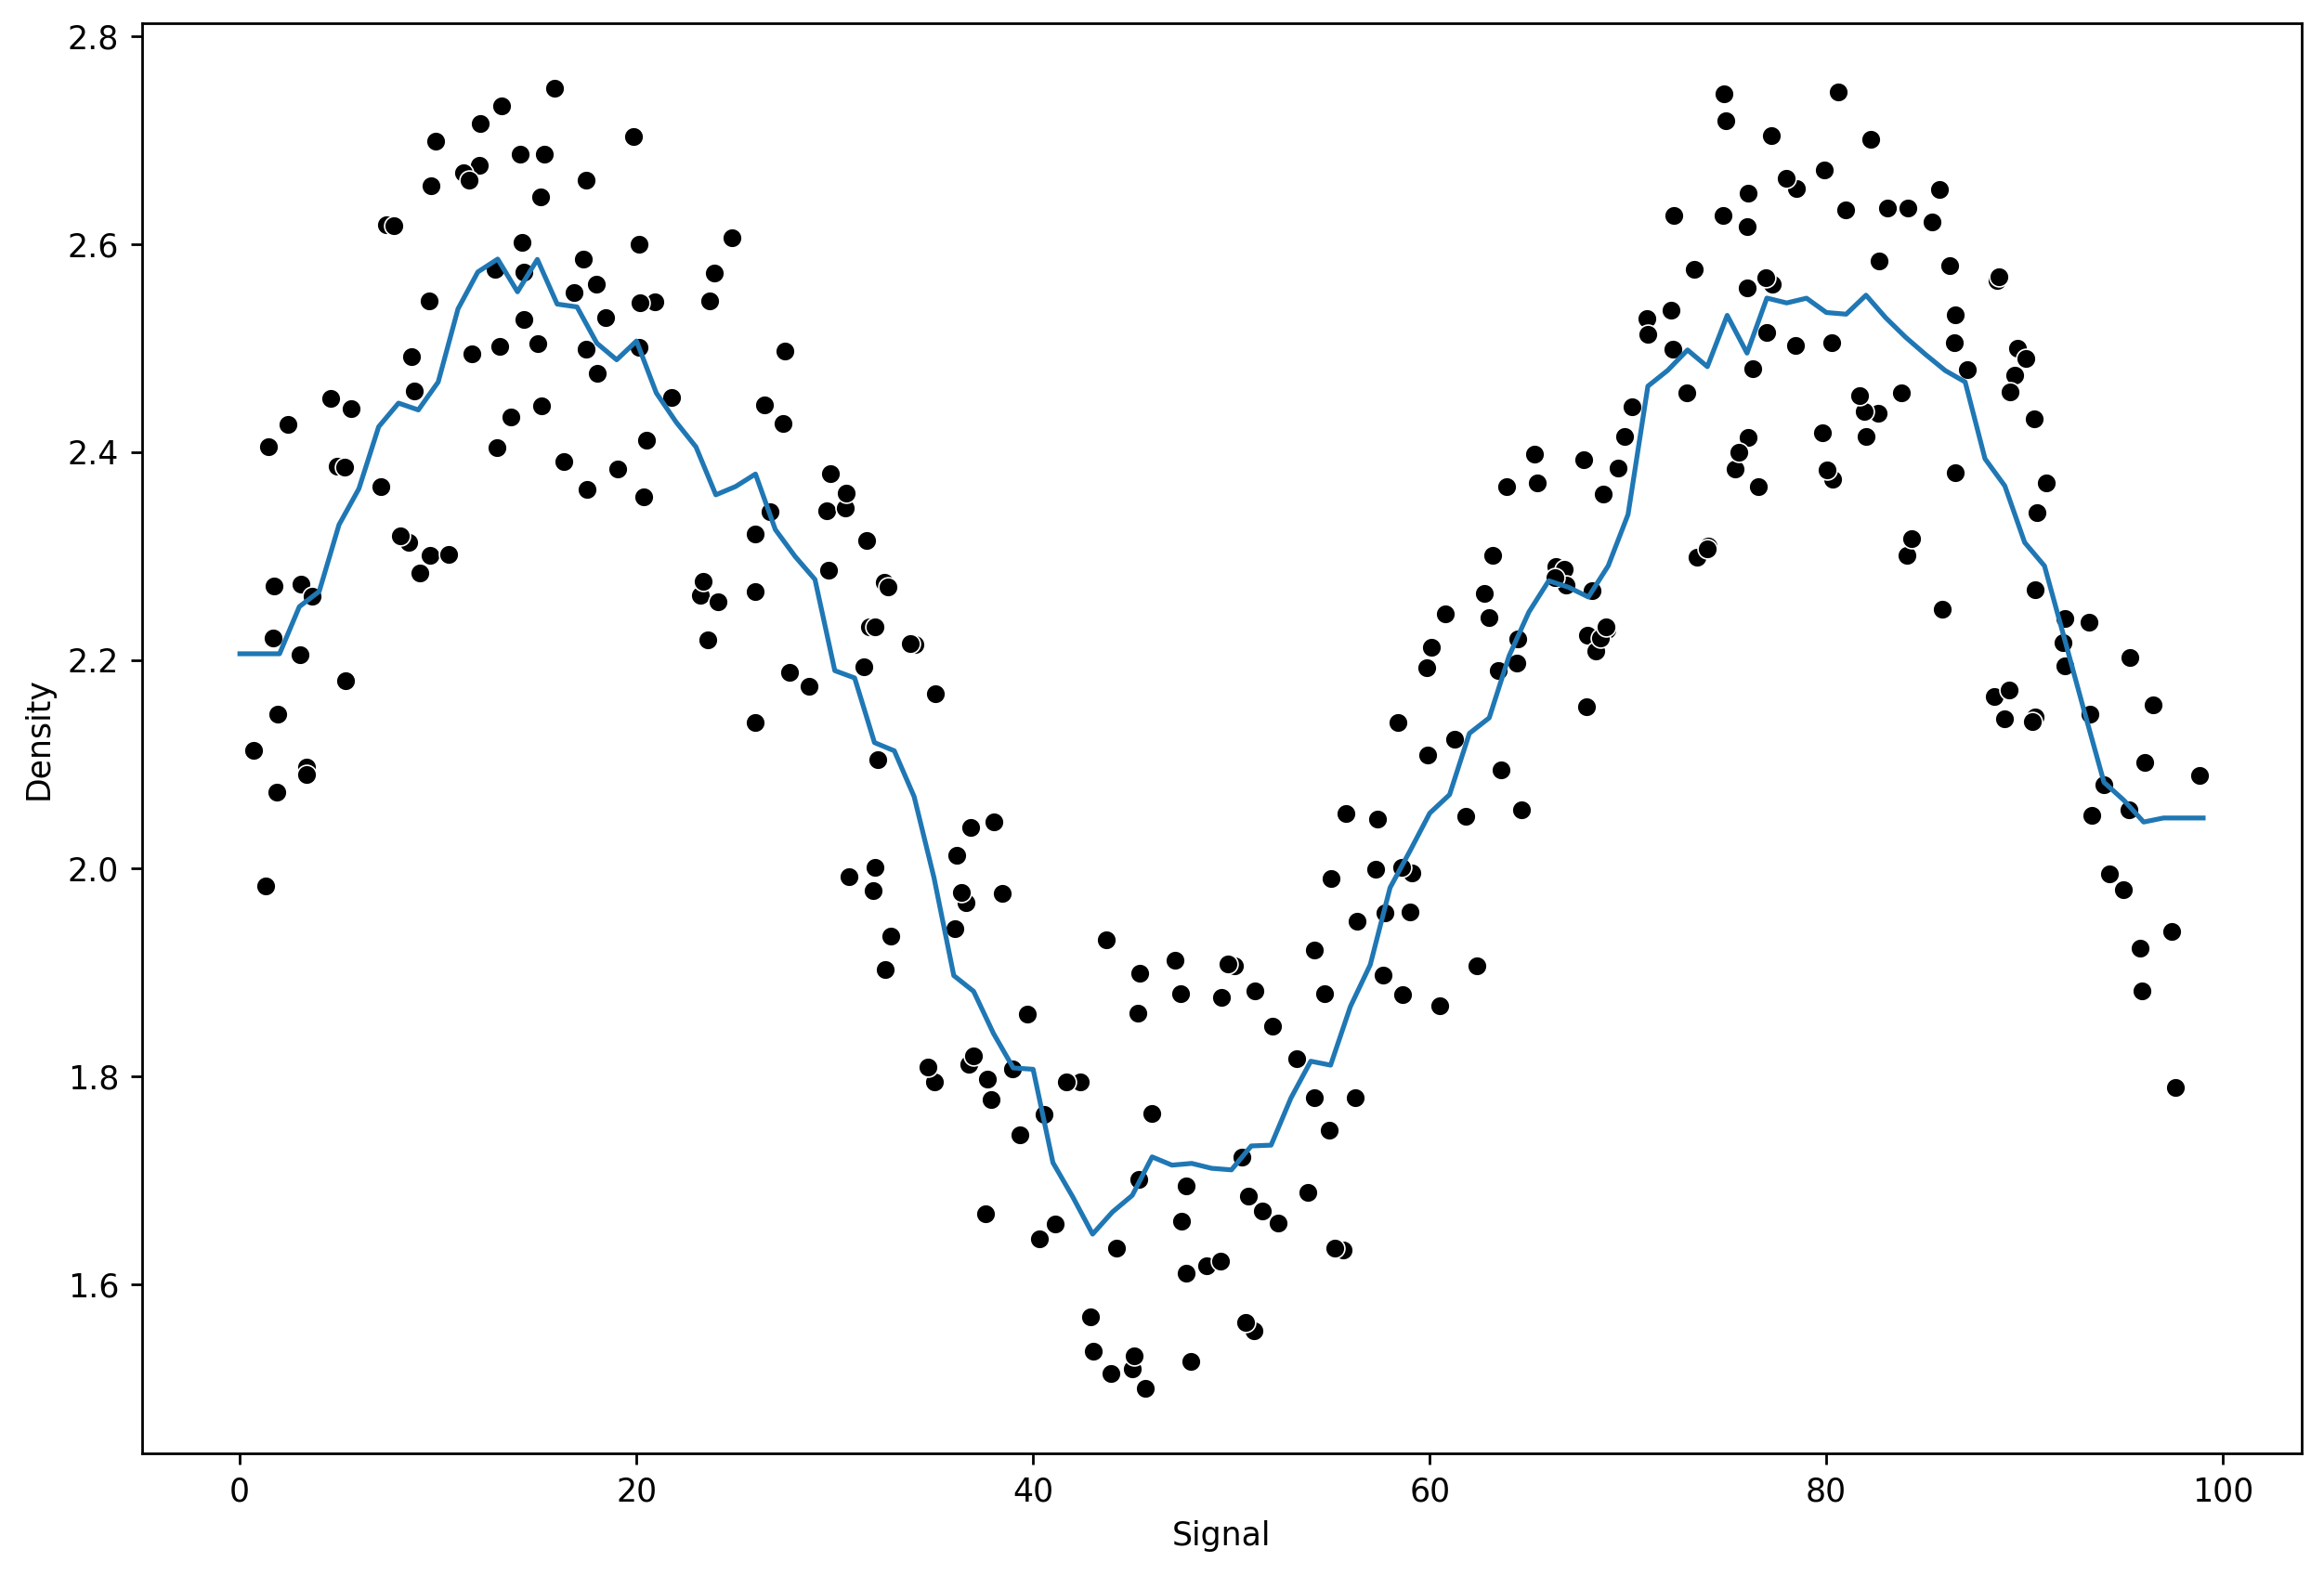

In [37]:
k_values = [1, 5, 10]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [38]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


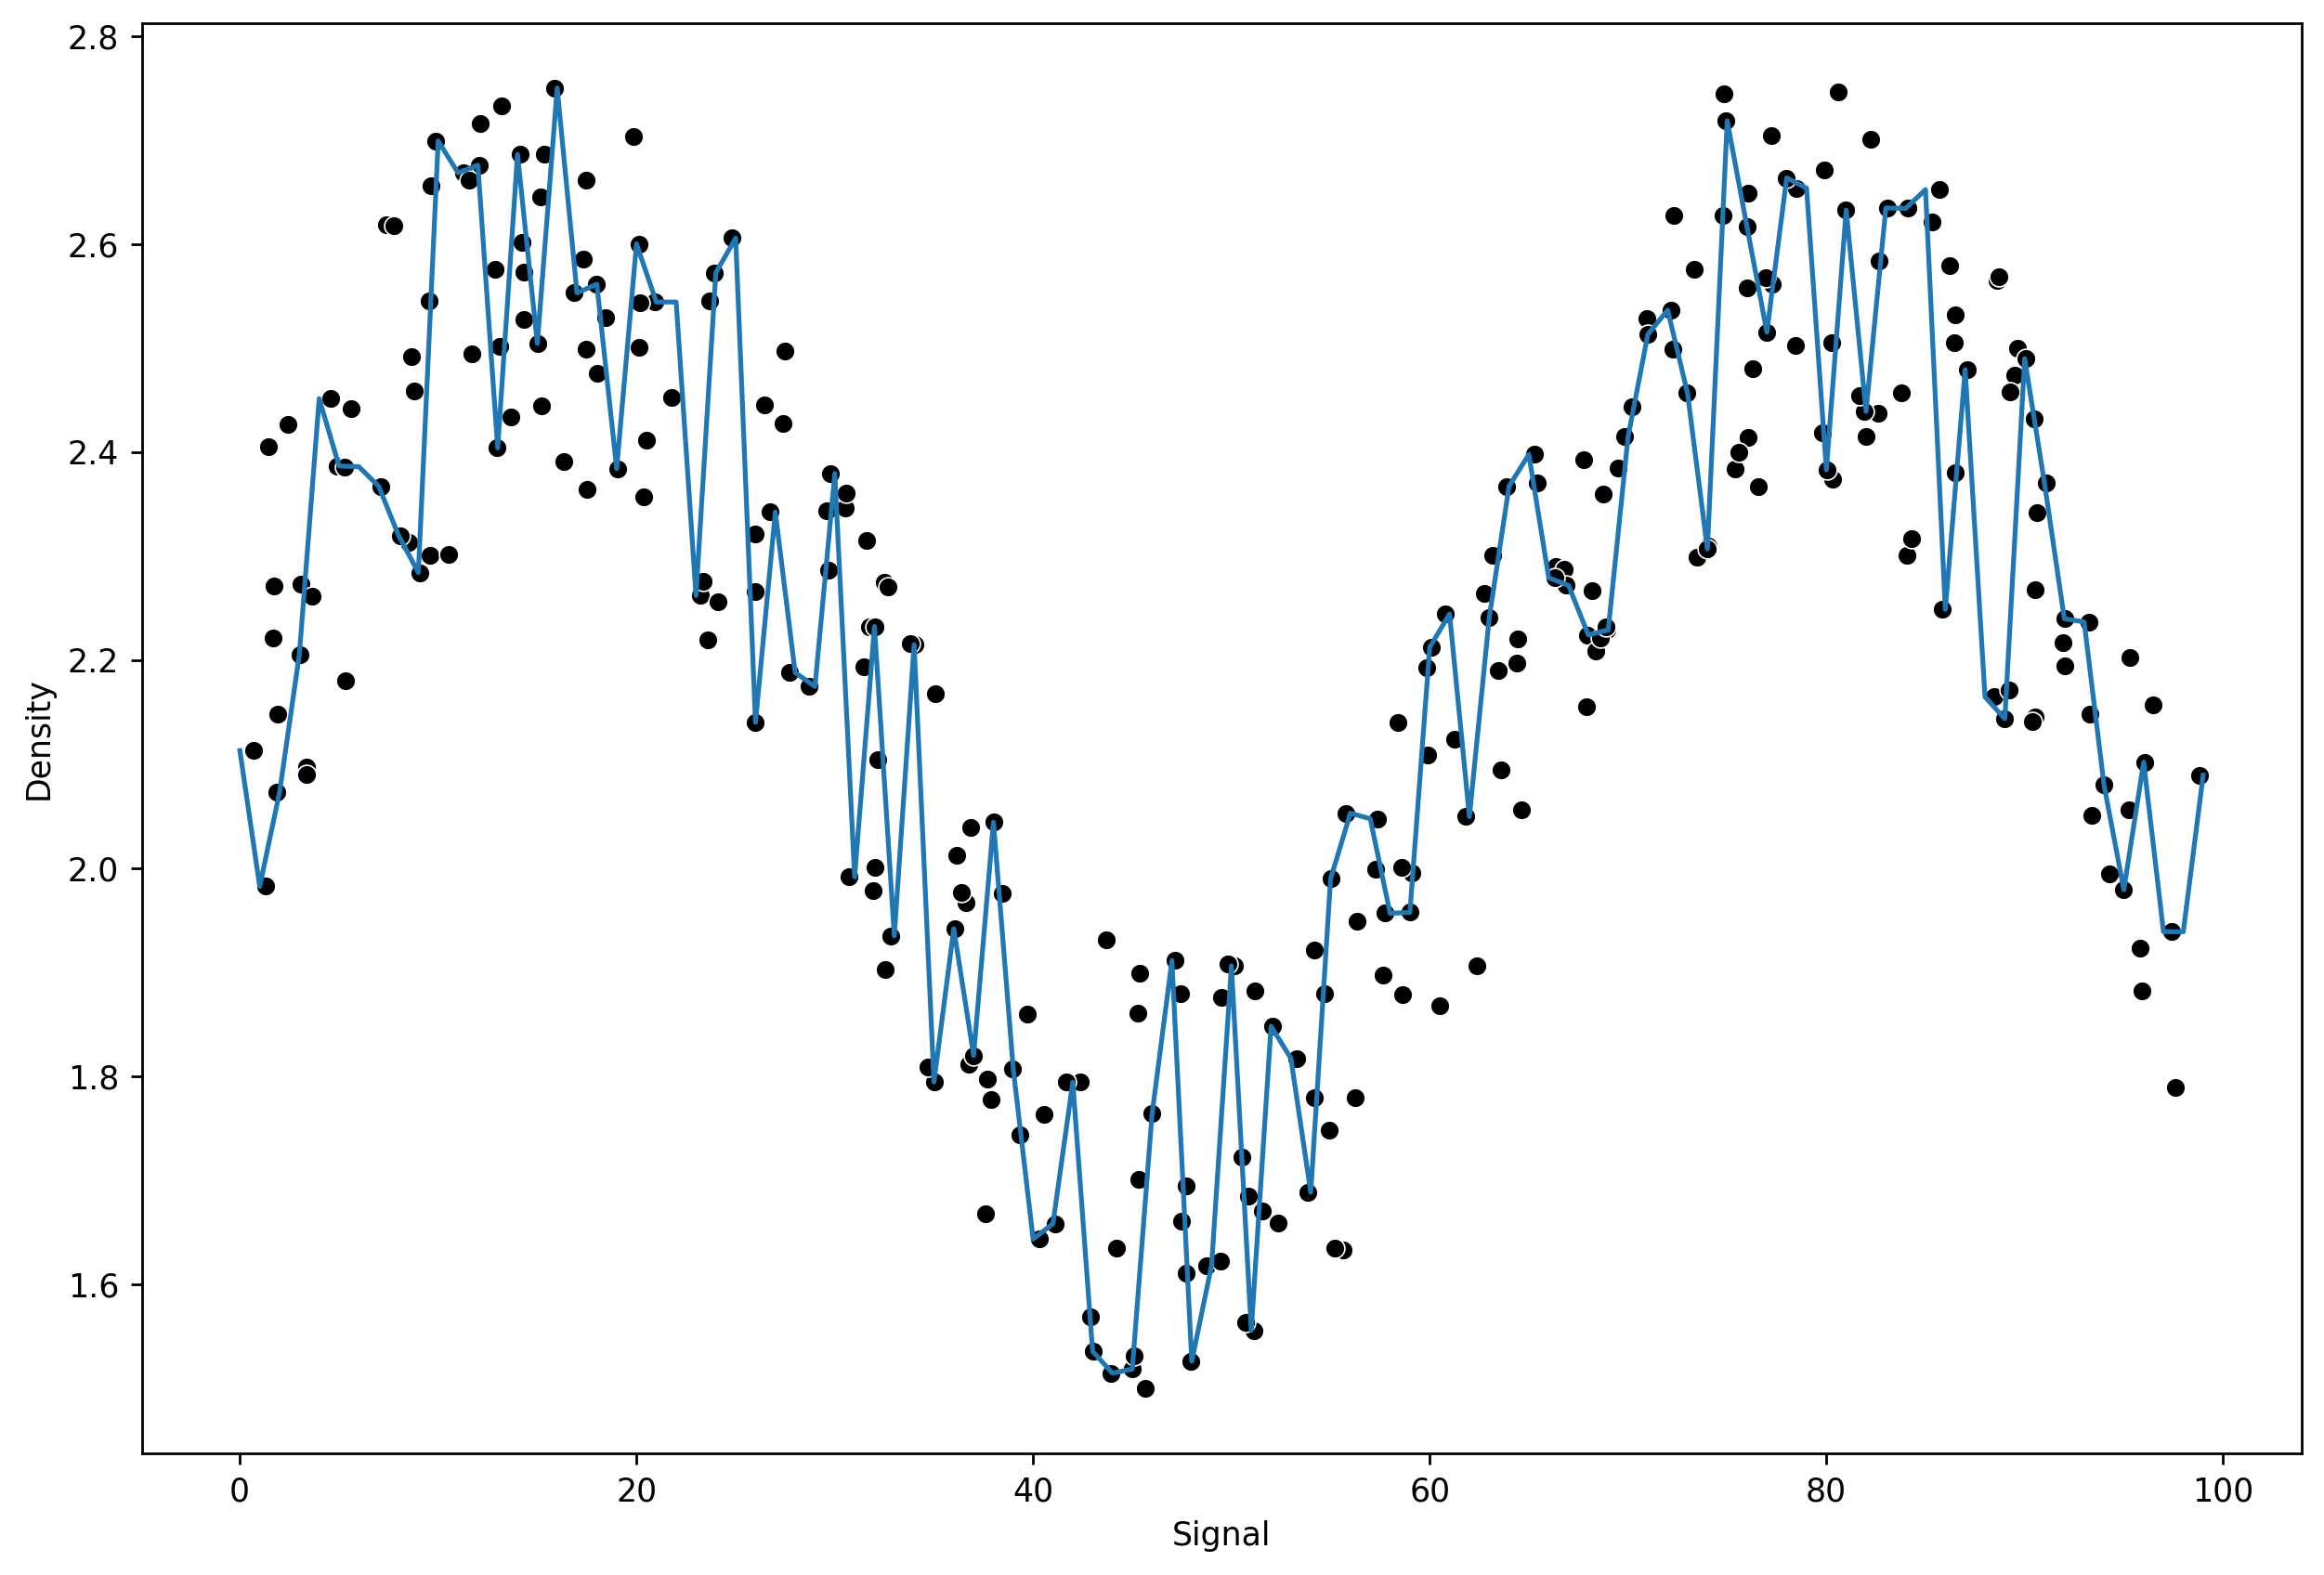

In [39]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [40]:
from sklearn.svm import SVR

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
svr = SVR()
param_grid = {'C':[0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


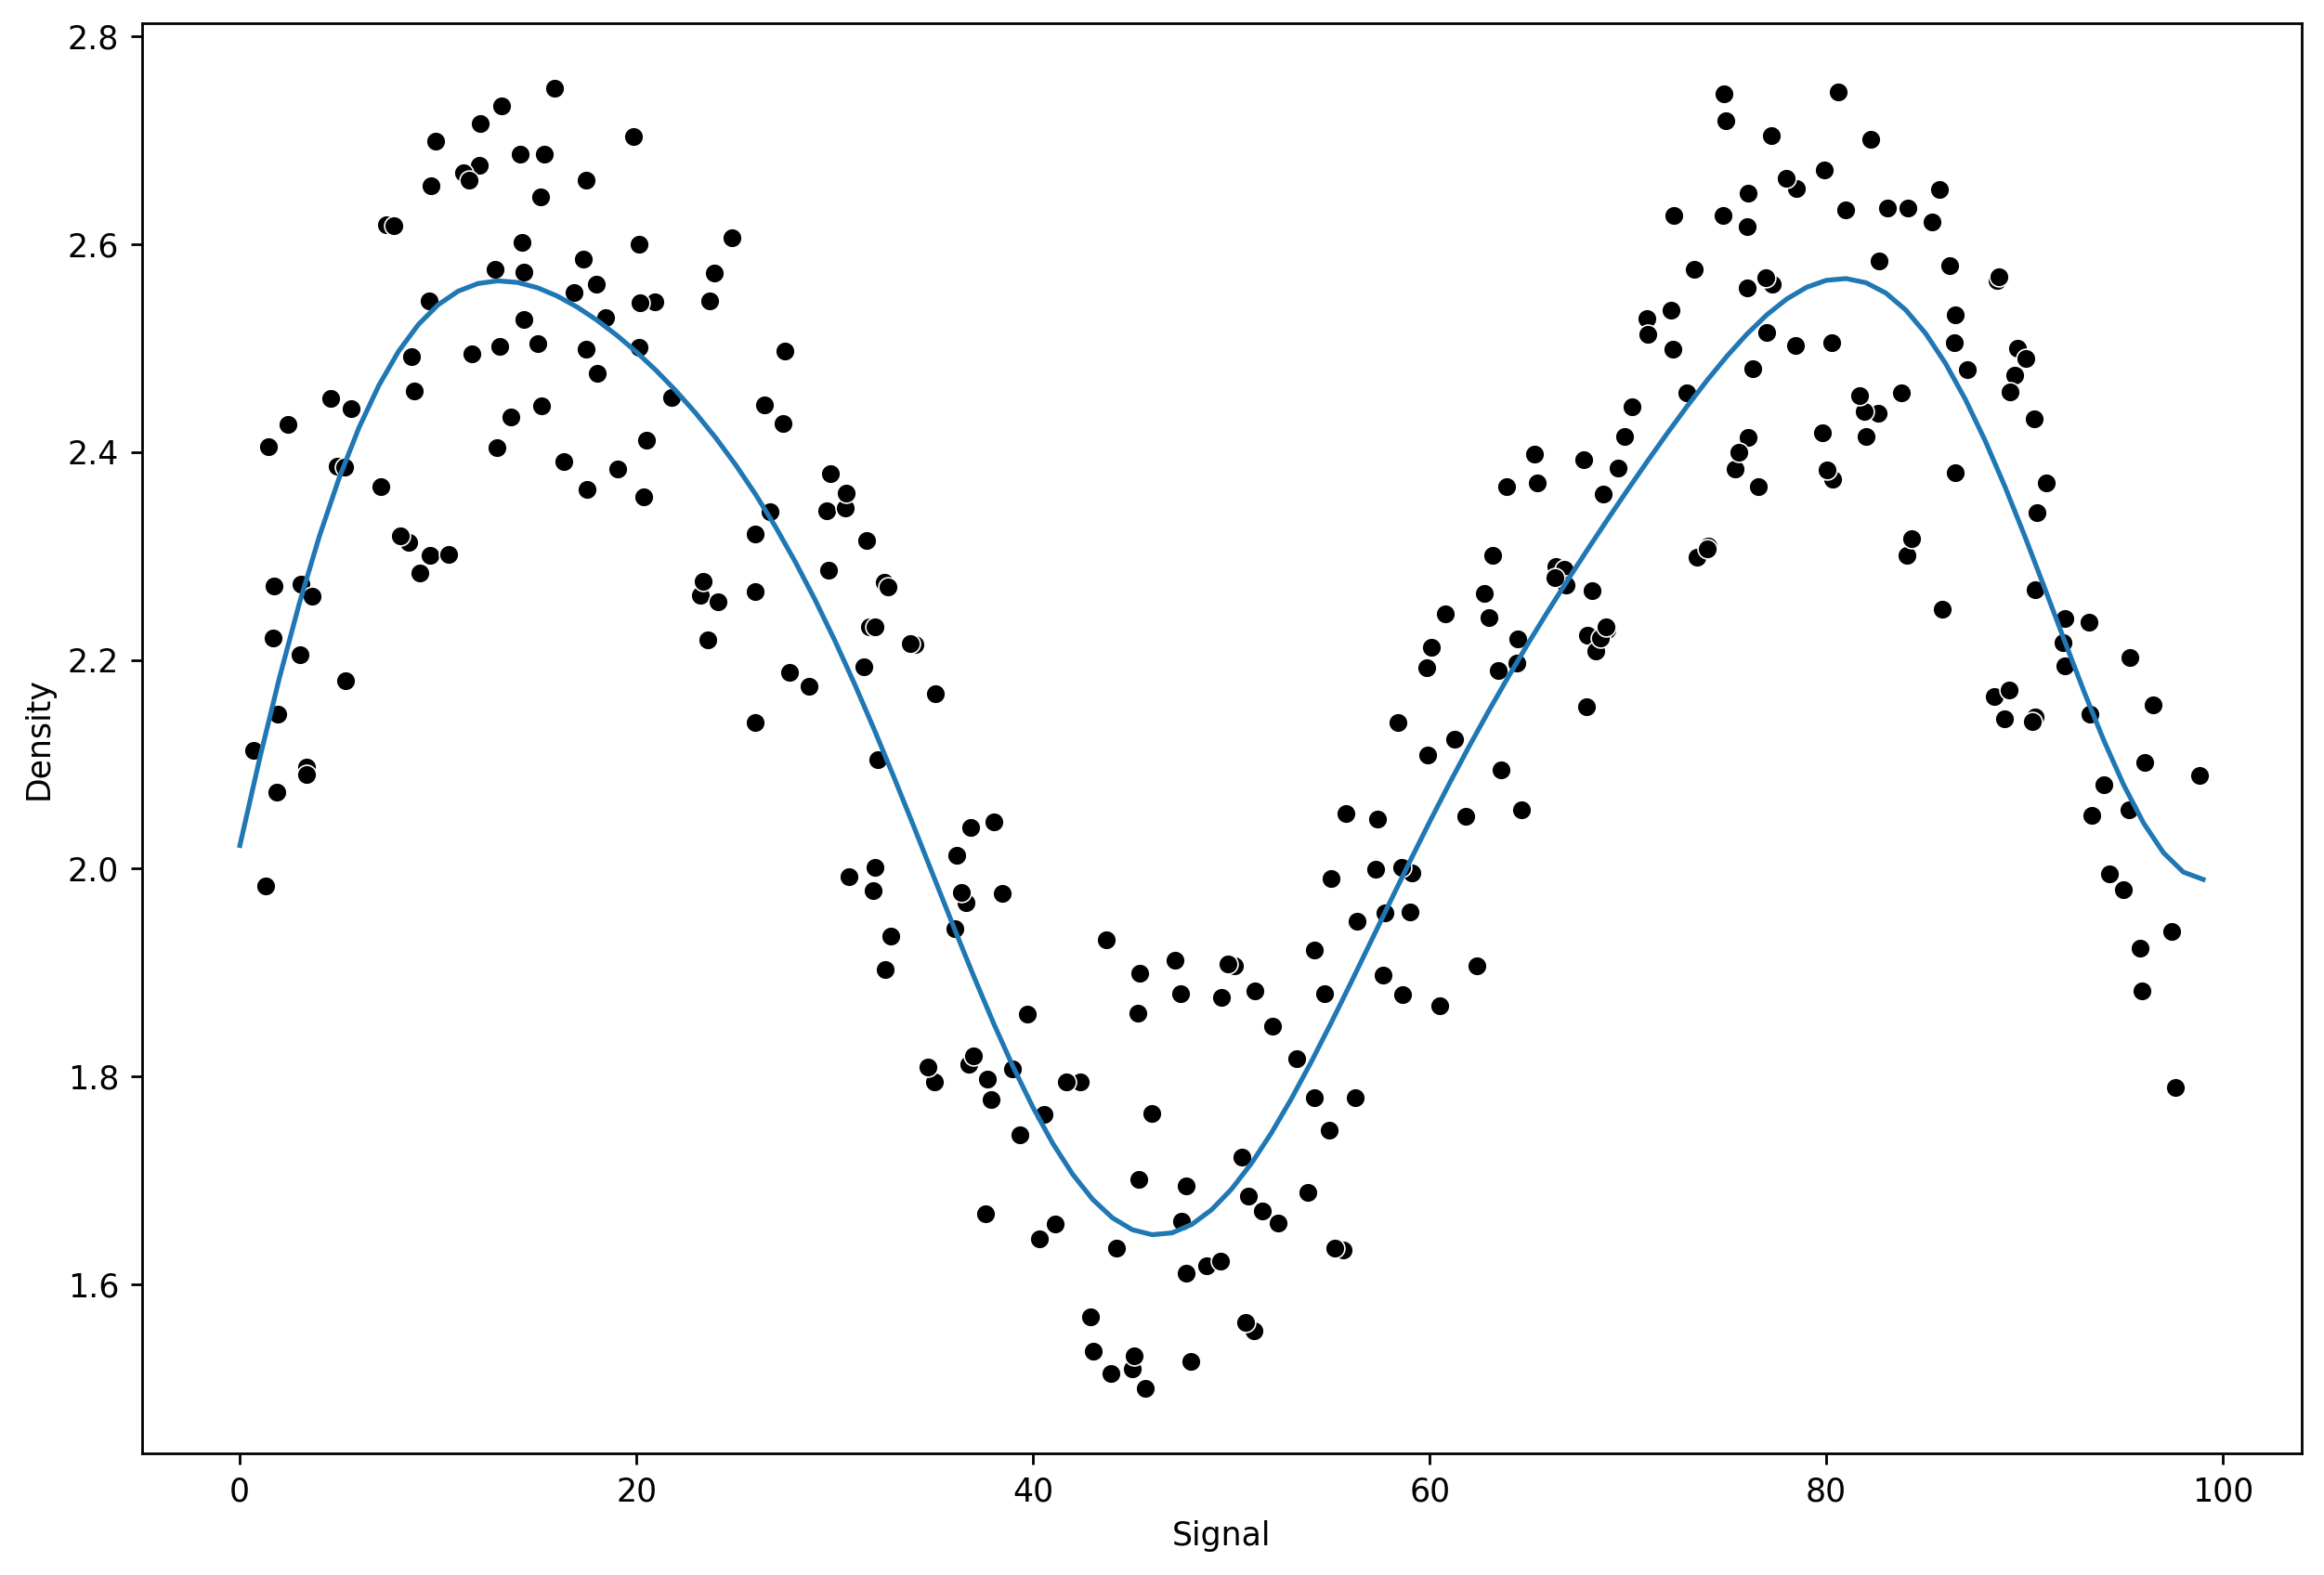

In [43]:
run_model(grid, X_train, y_train, X_test, y_test)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(n_estimators=10)

C:\Users\Craig Murray\AppData\Local\Temp\ipykernel_23628\3573138317.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


MAE: 0.11520503267357535
RMSE: 0.13978135468540642


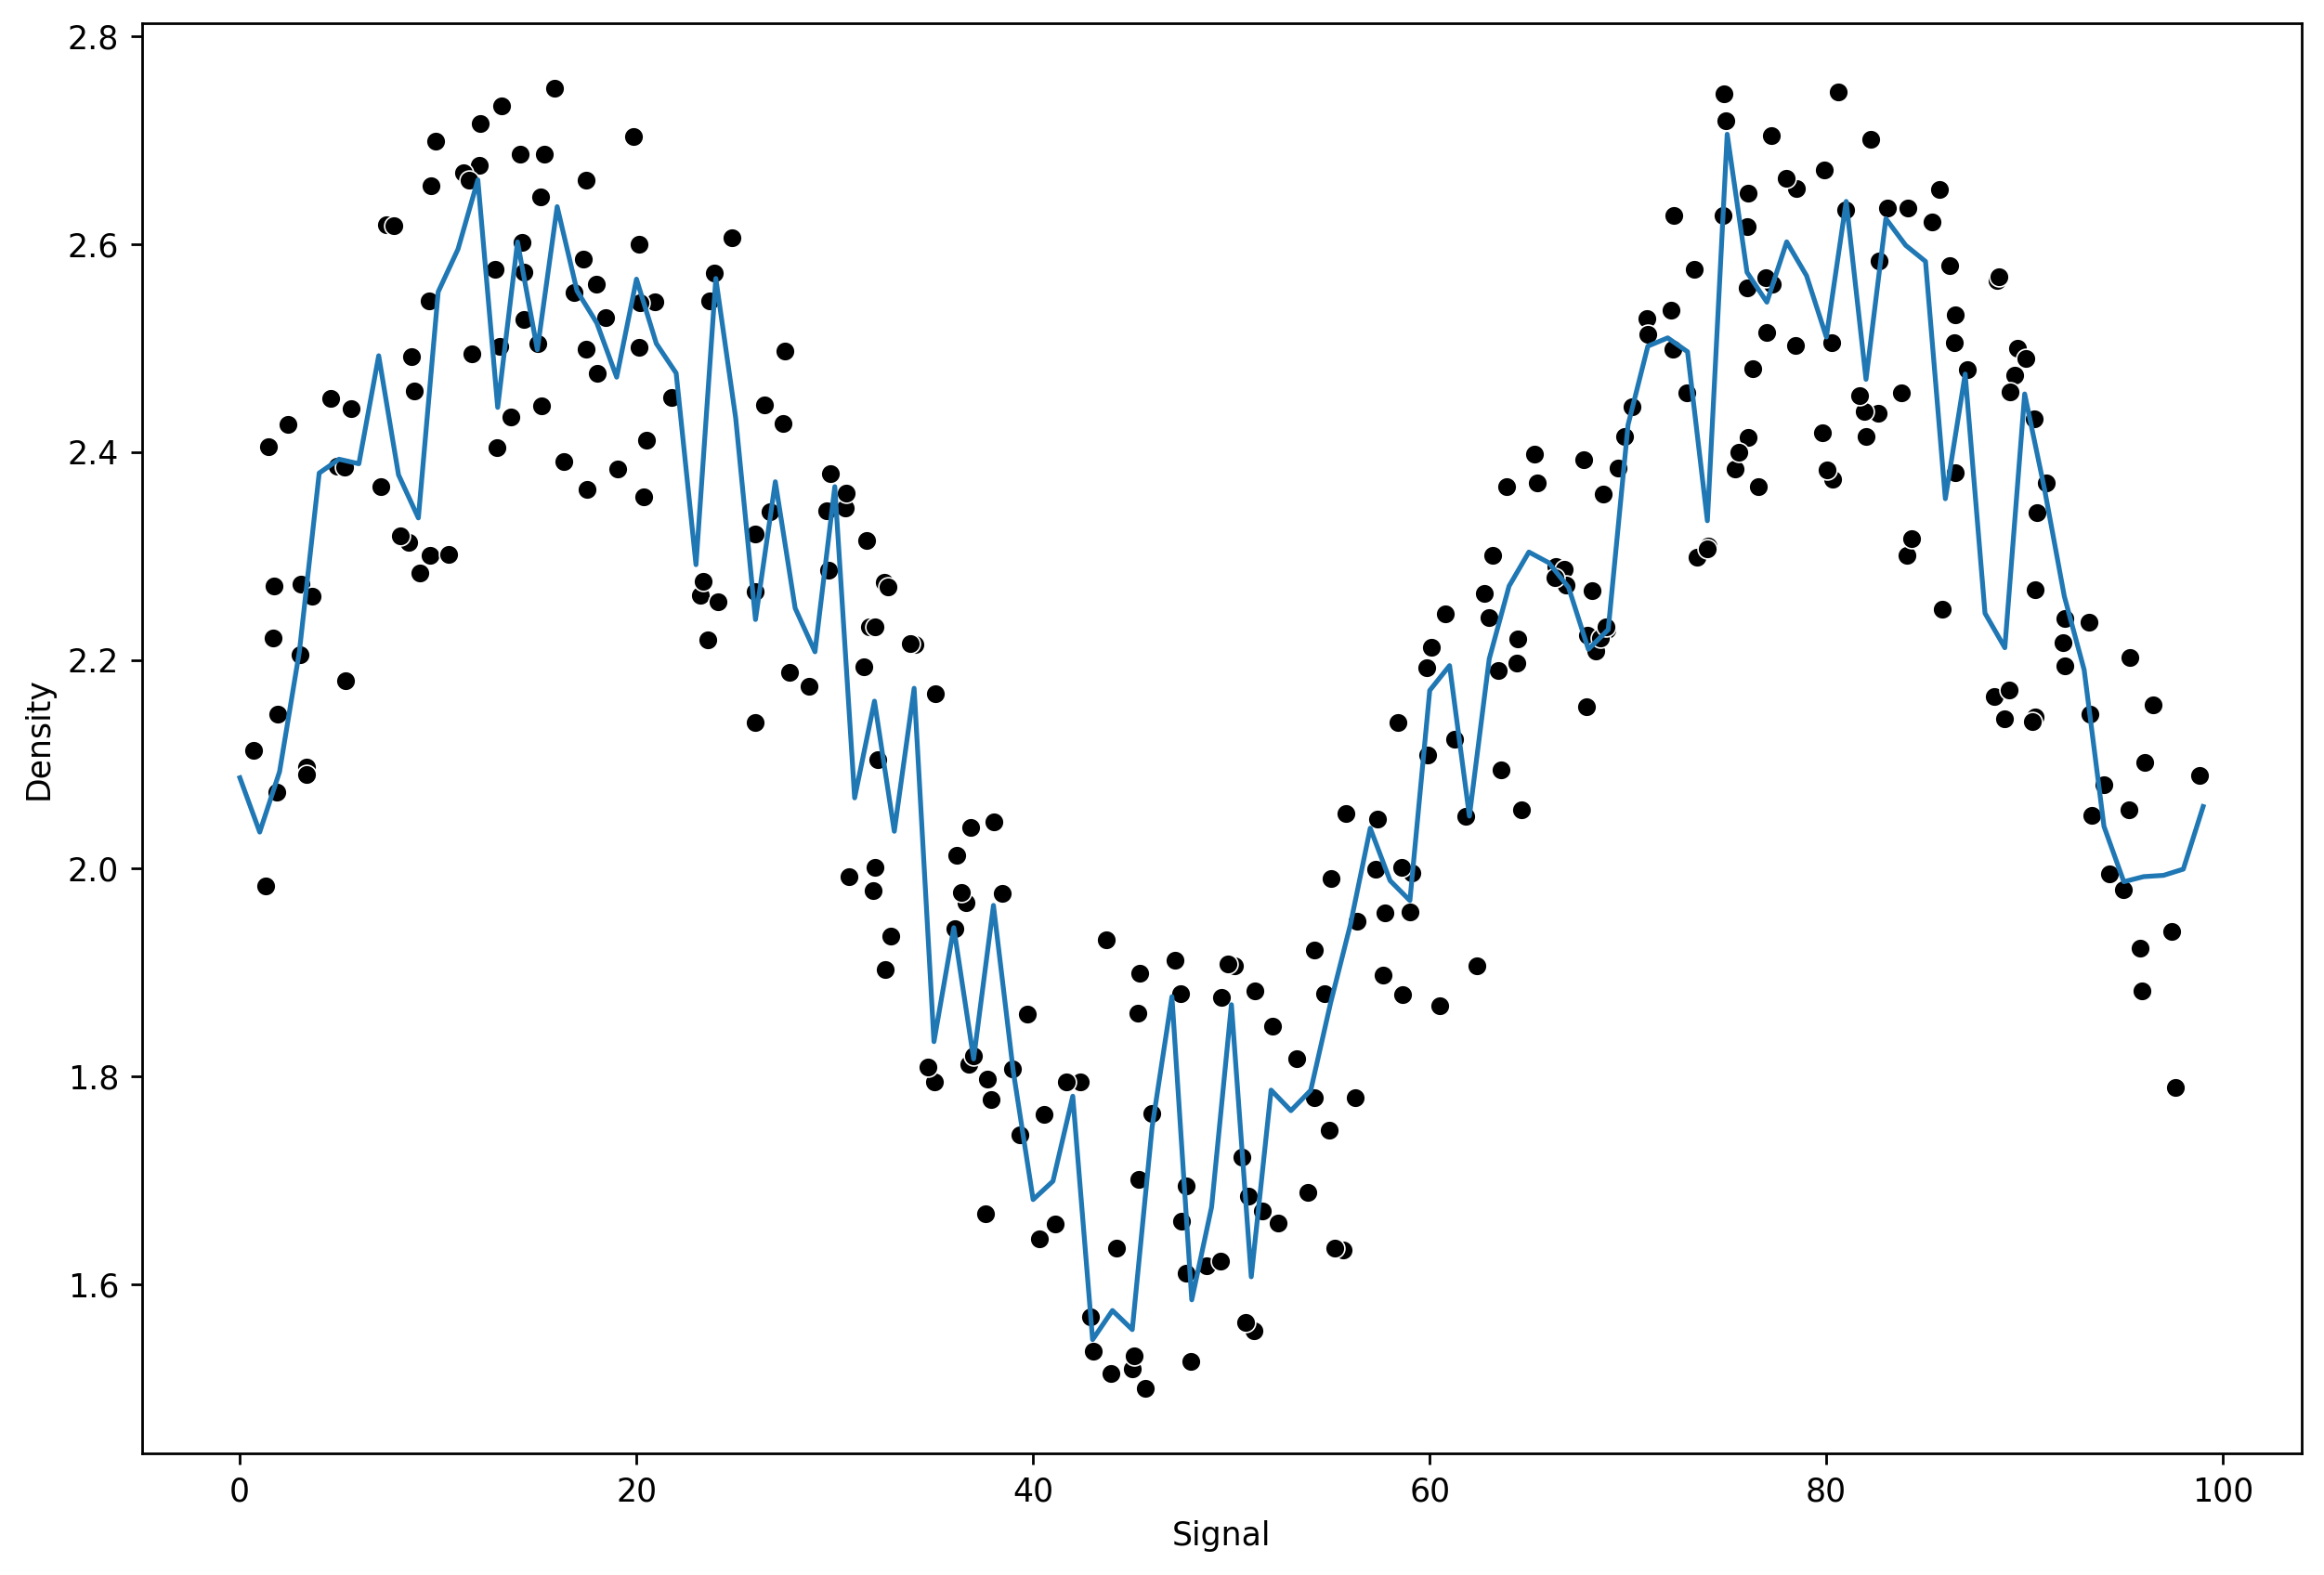

In [46]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.11318284854800689
RMSE: 0.13294148649584667


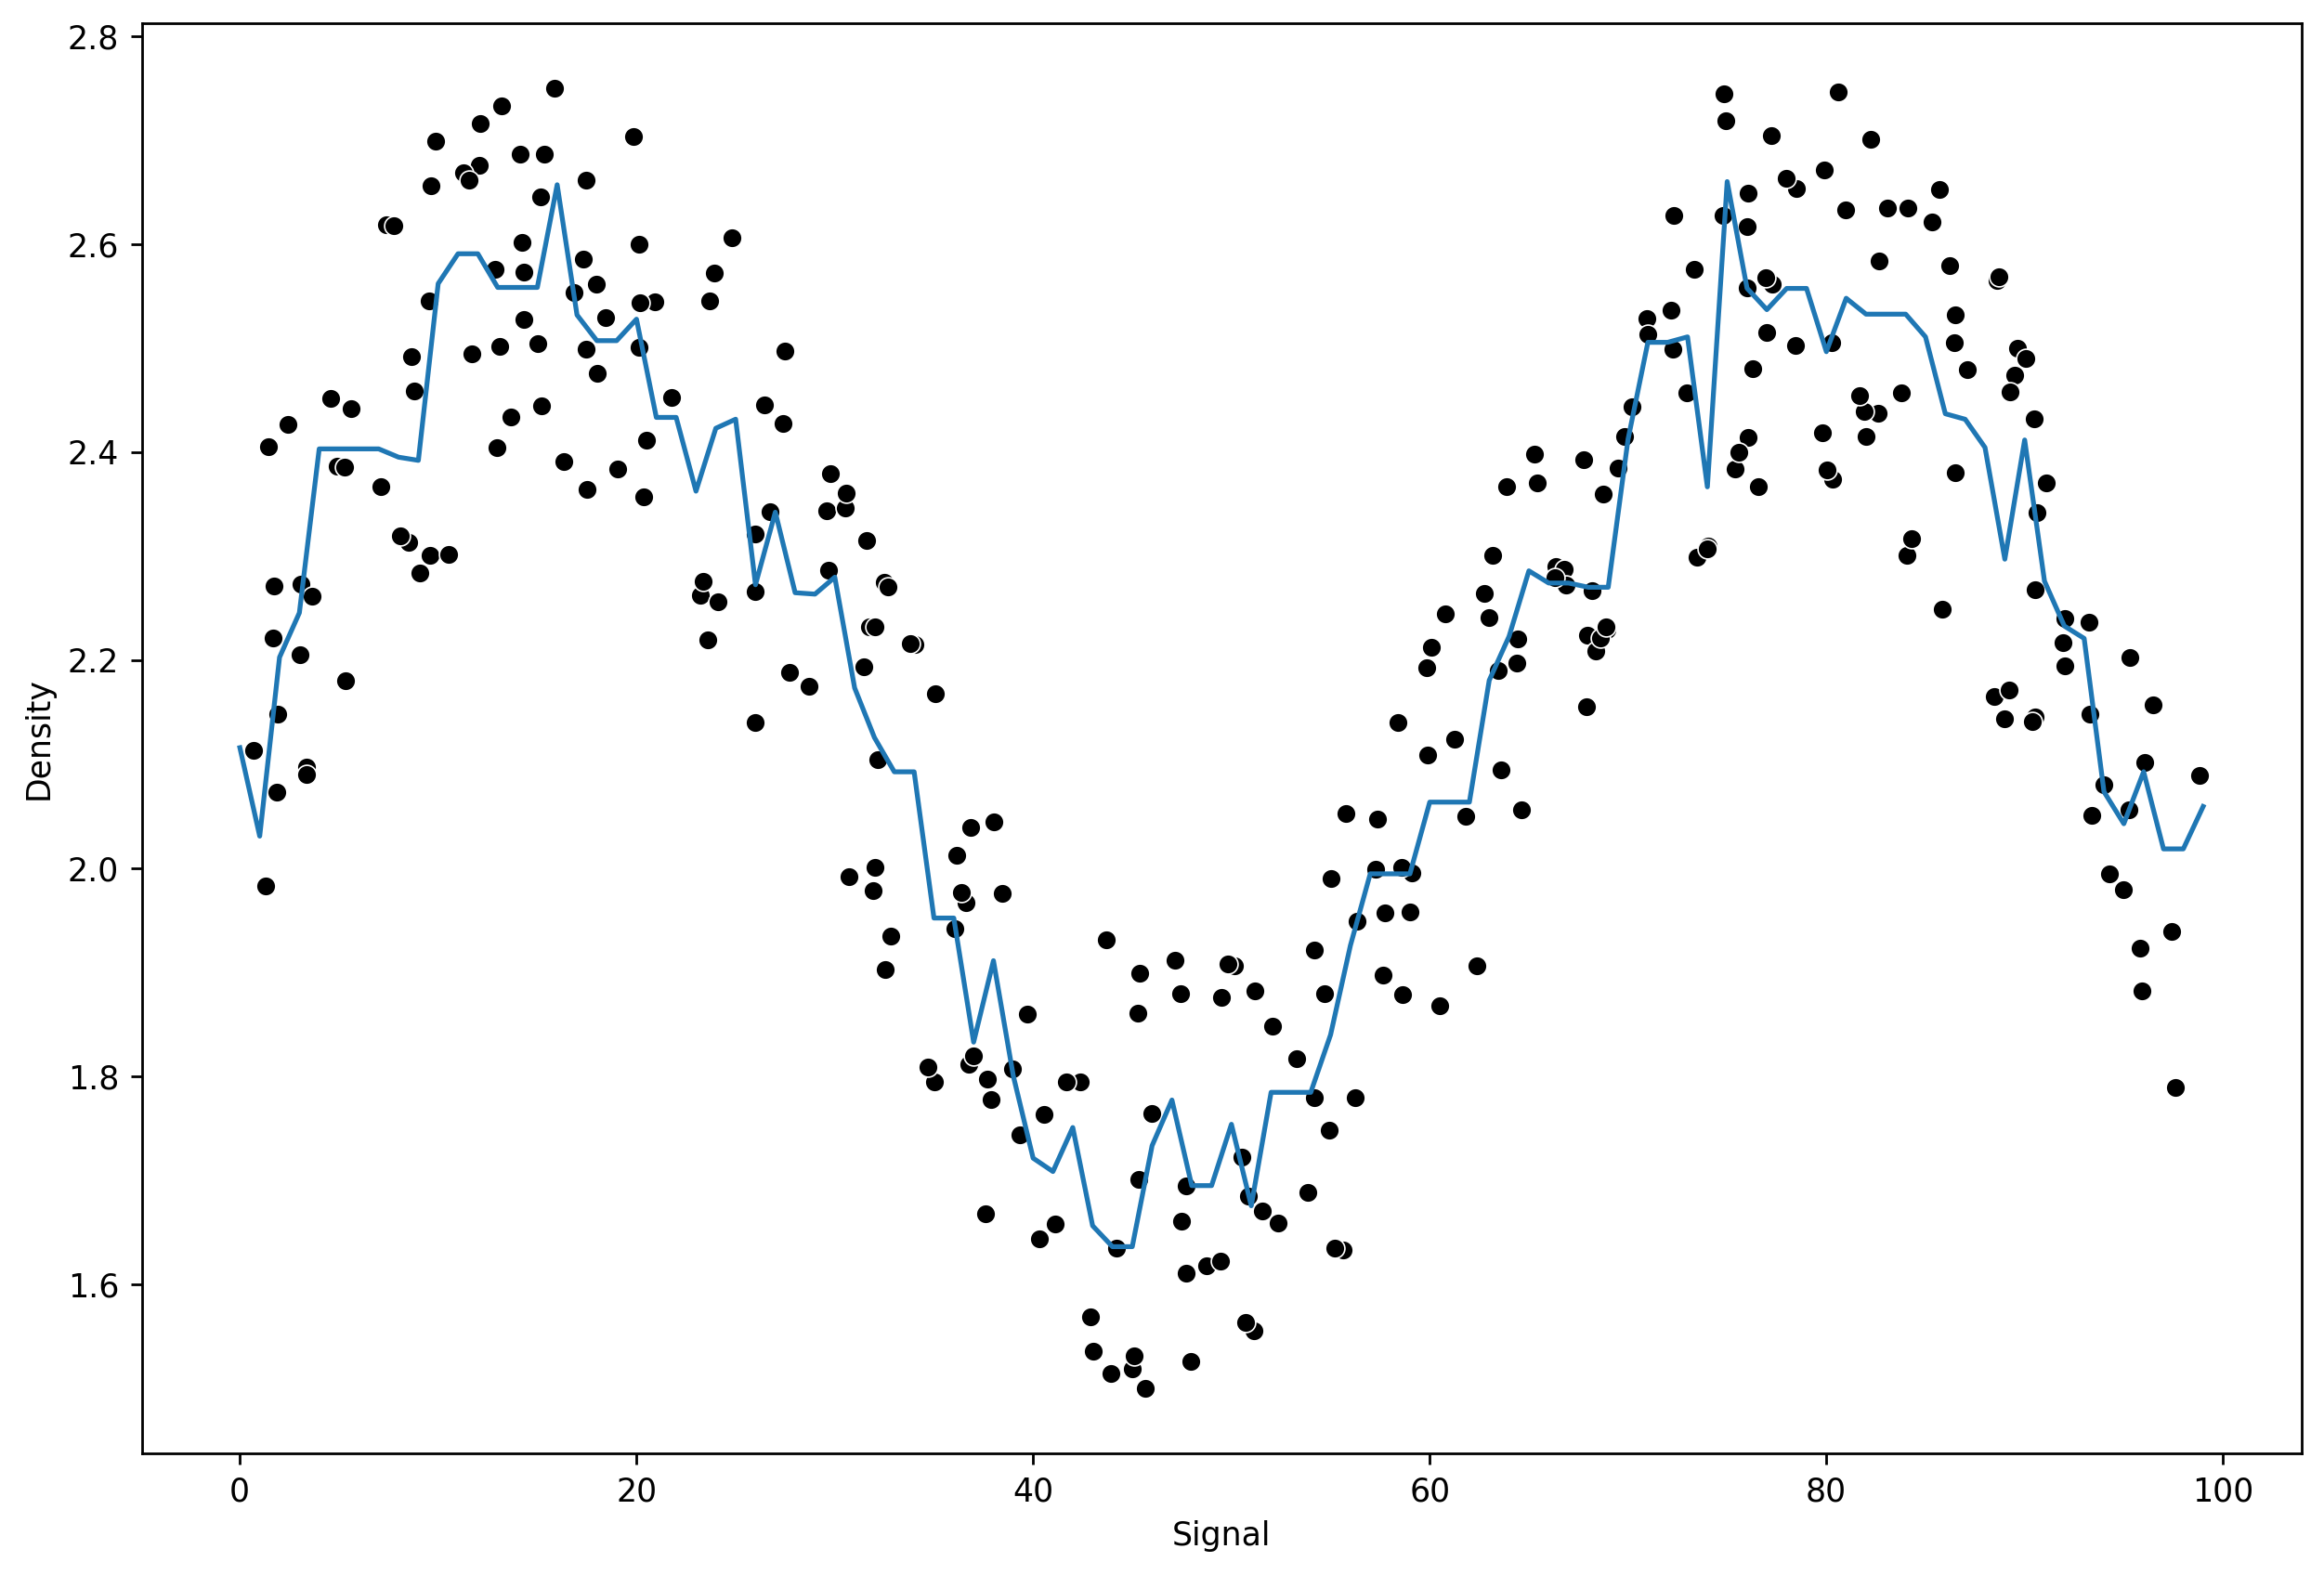

In [48]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.11234574939120429
RMSE: 0.13130498364953555


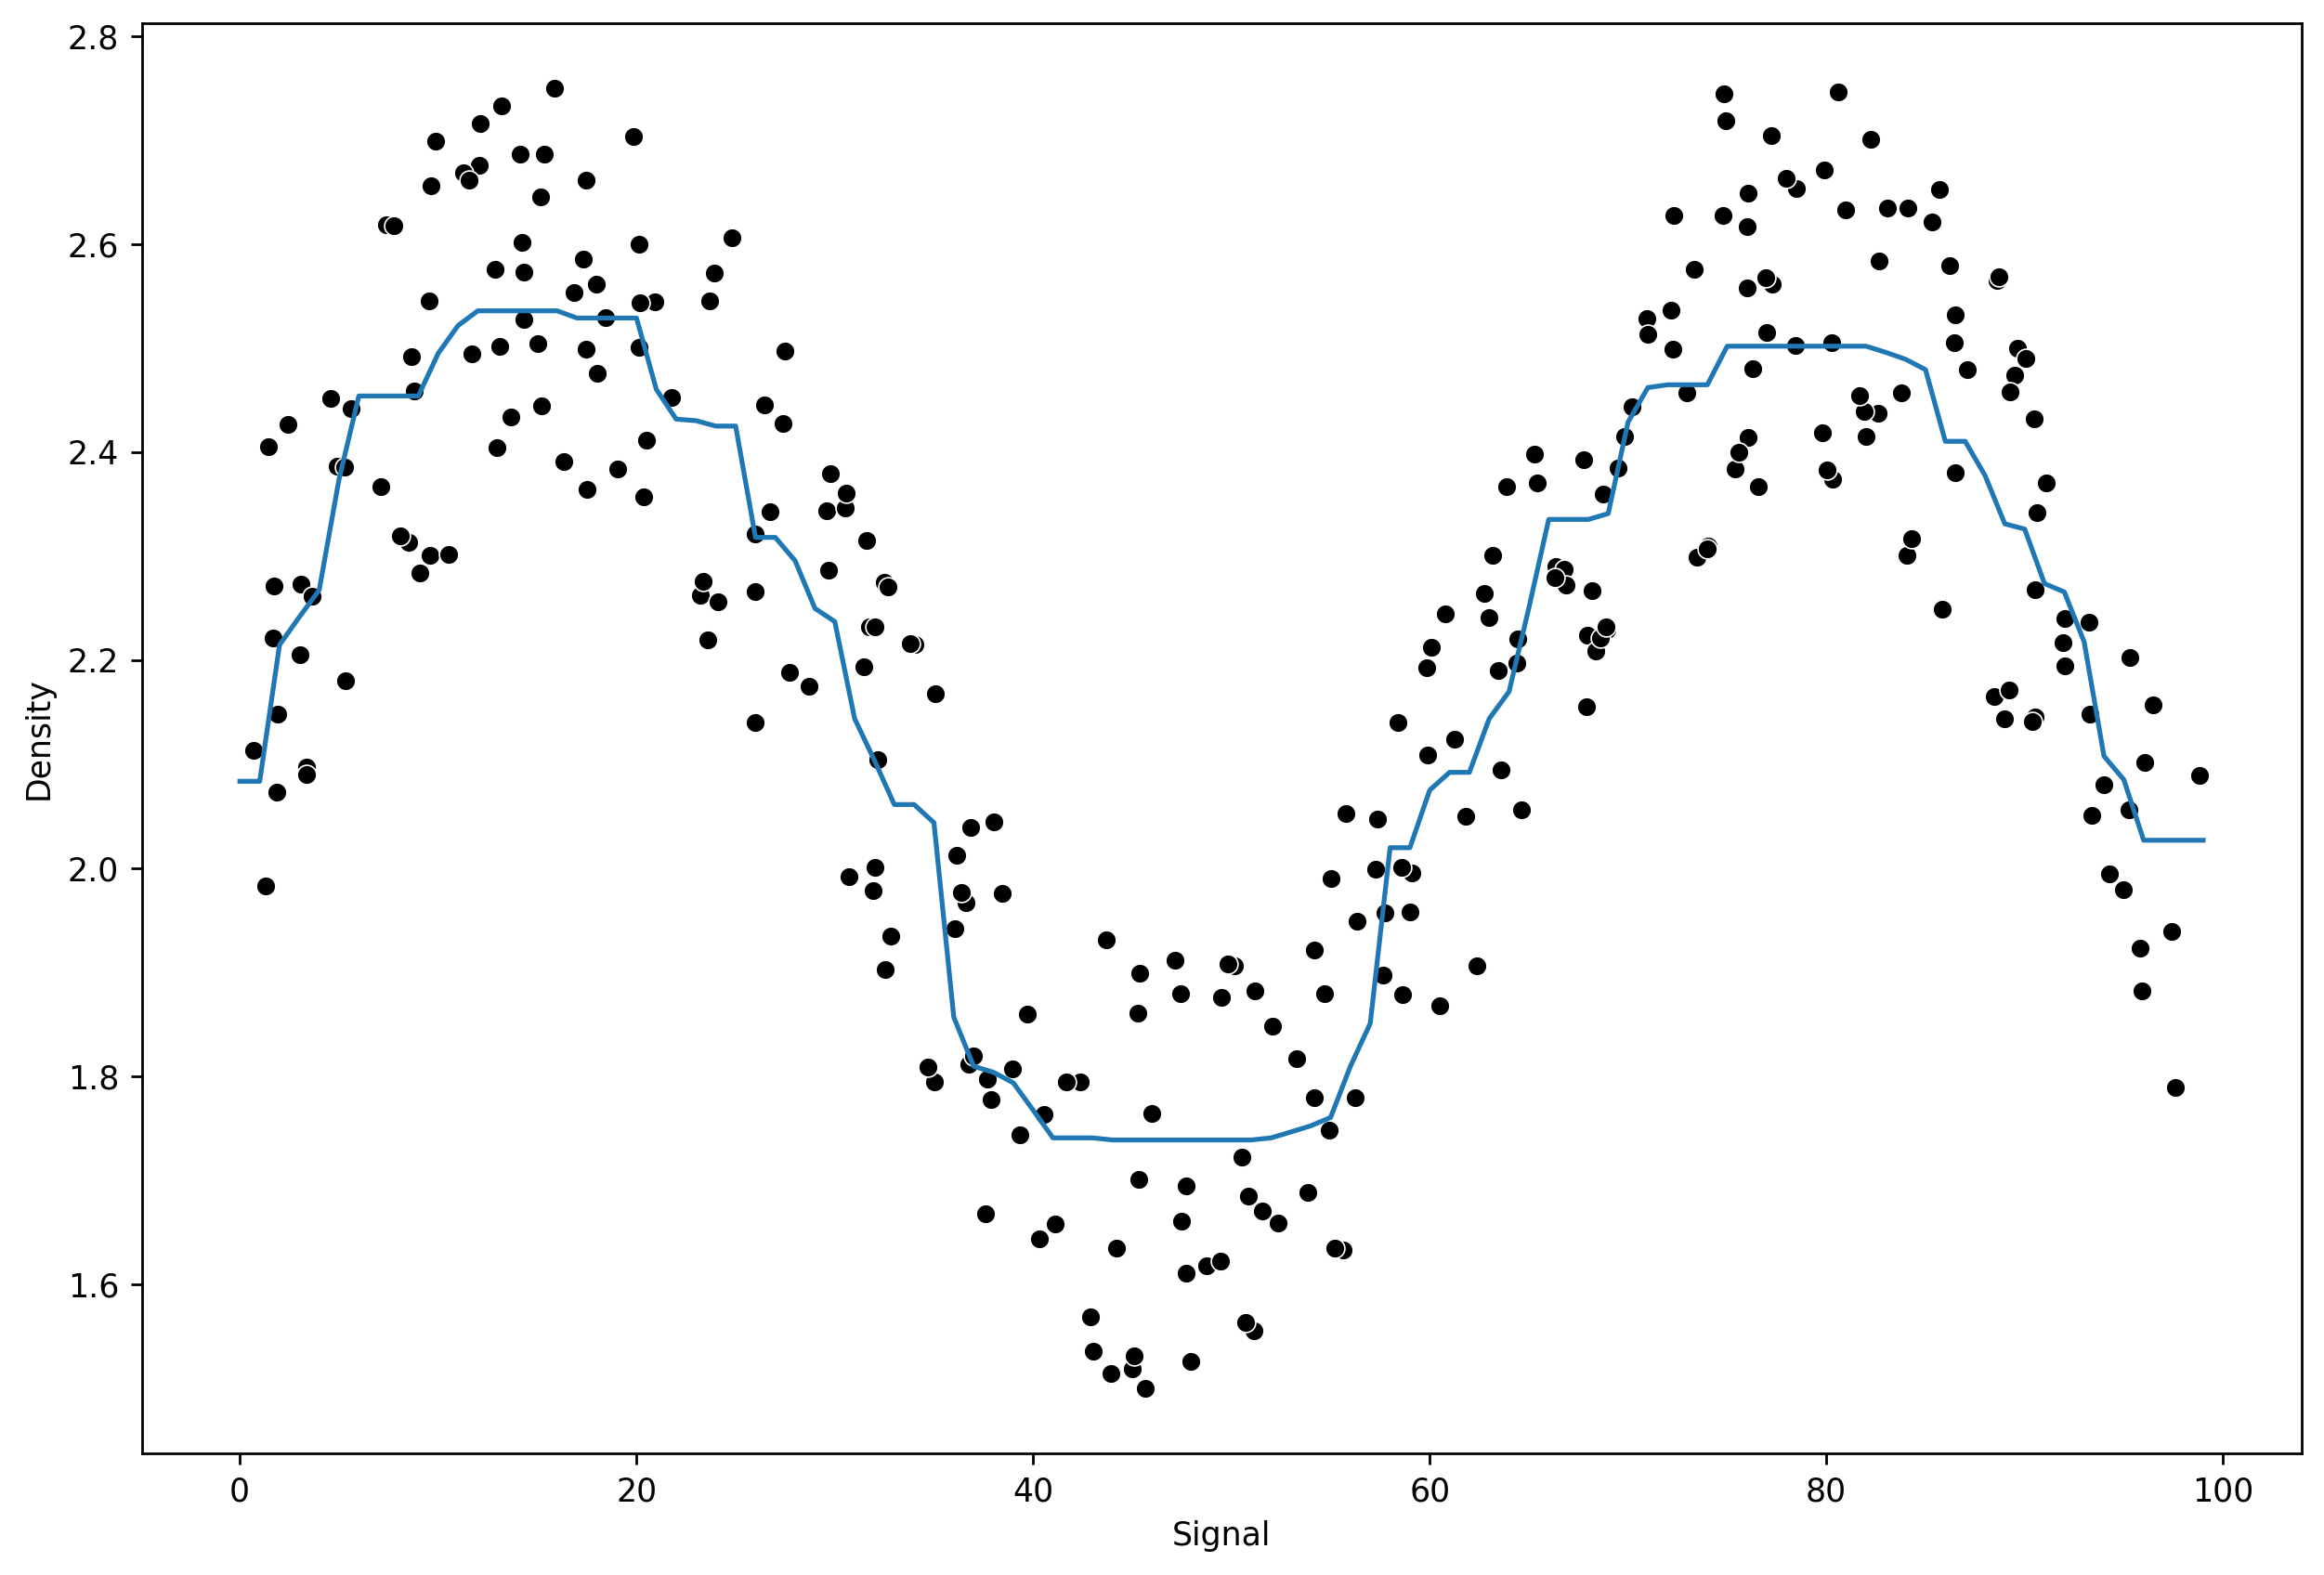

In [49]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)